In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import pygtc
import corner
import pickle
import agama
from scipy.special import gamma as gamma_fct
import pandas as pd
from matplotlib import rc
import utils as ut
import binning_methods_new as bm
#import CoordTrans as ct
#import dispersion_estimation as disp
#import binning_methods_new as bm2

agama.setUnits(mass=1,length=1,velocity=1)

In [2]:
# Auriga potential (calculated through Agama)

POTENTIAL_DM   = 'Au23_pot_dm_coef_mul.txt' # coefficients of the multipole potential expansion (Agama)
POTENTIAL_IN   = 'Au23_pot_in_coef_cylsp.txt' # coefficients for the cylindrical spline potential expansion (Agama)
POTENTIAL_ACC  = 'Au23_pot_acc_coef_mul.txt'
POTENTIAL_GAS  = 'Au23_pot_gas_coef_cylsp.txt'

# Define potential
pot_dmAu = agama.Potential(file = POTENTIAL_DM)
pot_inAu = agama.Potential(file = POTENTIAL_IN)
pot_gasAu = agama.Potential(file = POTENTIAL_GAS)
pot_accAu = agama.Potential(file = POTENTIAL_ACC)
pot_totAu = agama.Potential(pot_dmAu,pot_inAu,pot_gasAu,pot_accAu)
#pot_totAu = agama.Potential(pot_dmAu,pot_inAu,pot_accAu)

#pot_totAu = agama.Potential(pot_inAu,pot_gasAu,pot_accAu)



In [3]:
pot_totAu_nogas = agama.Potential(pot_dmAu,pot_inAu,pot_accAu)

NameError: name 'pot_totAu_nogas' is not defined

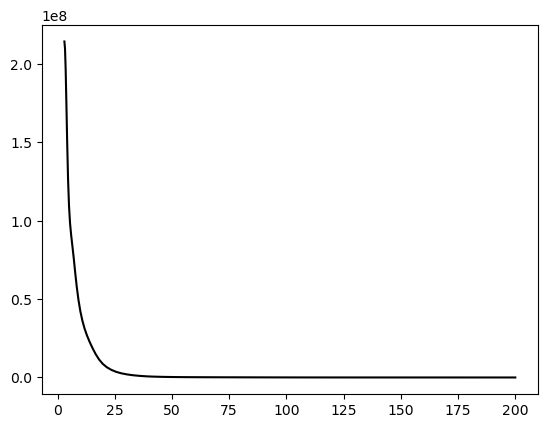

In [3]:
r = np.logspace(np.log10(3),np.log10(200),50)
rgrid = np.column_stack((r,r*0,r*0))

# plt.plot(r,pot_dmAu.density(rgrid),label='DM')
# plt.plot(r,pot_inAu.density(rgrid),label='in situ')
# plt.plot(r,pot_accAu.density(rgrid),label='accreted')
# plt.plot(r,pot_gasAu.density(rgrid),label='gas')
plt.plot(r,pot_totAu.density(rgrid),c='black',label='total')
plt.plot(r,pot_totAu_nogas.density(rgrid),'--',c='black',label='total, no gas')

plt.ylabel(r'$\rho$')
plt.xlabel('r (kpc)')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [3]:
# Read in accreted particles data

folder_sim = "/home/paulagherghinescu/PhD/ProjectedDF/MC_sampling/Auriga/Au23_data_acc/"


x_acc = np.loadtxt(folder_sim+'x_acc.txt')
y_acc = np.loadtxt(folder_sim+'y_acc.txt')
z_acc = np.loadtxt(folder_sim+'z_acc.txt')
vx_acc = np.loadtxt(folder_sim+'vx_acc.txt')
vy_acc = np.loadtxt(folder_sim+'vy_acc.txt')
vz_acc = np.loadtxt(folder_sim+'vz_acc.txt')

In [4]:
xAu = np.copy(x_acc)
yAu = np.copy(y_acc)
zAu = np.copy(z_acc)
vxAu = np.copy(vx_acc)
vyAu = np.copy(vy_acc)
vzAu = np.copy(vz_acc)

### Best-fit model

In [3]:
# Emcee chains
plt.rcParams['text.usetex'] = False

#backend_file = "Backend_Au23_halo_3d_nstars_1000_impsamp_i0_smooth_sampled.h5"
#backend_file = "Backend_Au23_halo_3d_nstars_1000_impsamp_i45_smooth_sampled.h5"
#backend_file = "Backend_Au23_halo_3d_nstars_1000_impsamp_i90_smooth_sampled.h5"

##backend_file = "Backend_Au23_halo_3d_nstars_1000_impsamp_i0_smooth_qprior.h5"
#backend_file = "Backend_Au23_halo_3d_nstars_1000_impsamp_i90_smooth_qprior.h5"
backend_file = "Backend_Au23_halo_3d_nstars_1000_impsamp_i45_smooth_qprior.h5"


reader = emcee.backends.HDFBackend(backend_file, read_only=True)
samples = reader.get_chain(discard=0)
log_prob = reader.get_log_prob(flat = True)
labels =np.array([r"$\beta_{in}$", r"$\beta_{out}$", r"$J_{0}$", 'hr','hz','gr','gz','rotFrac',r'$\rho0$', r'$R_{s}$','q','alpha','beta','gamma','mass_b','mass_d'])
labels =np.array([r"$\beta_{in}$", r"$\beta_{out}$", r"$J_{0}$", 'hr','hz','gr','gz','rotFrac',r'$\rho0$', r'$R_{s}$','q'])


In [4]:
np.shape(samples)

(42769, 22, 11)

In [5]:
log_prob_noflat = reader.get_log_prob(flat = False)
print(np.shape(log_prob_noflat))

(42769, 22)


In [6]:
print(min(log_prob))
print(max(log_prob))

-34591.79699422642
-34281.10932940827


Text(0.5, 0, 'steps')

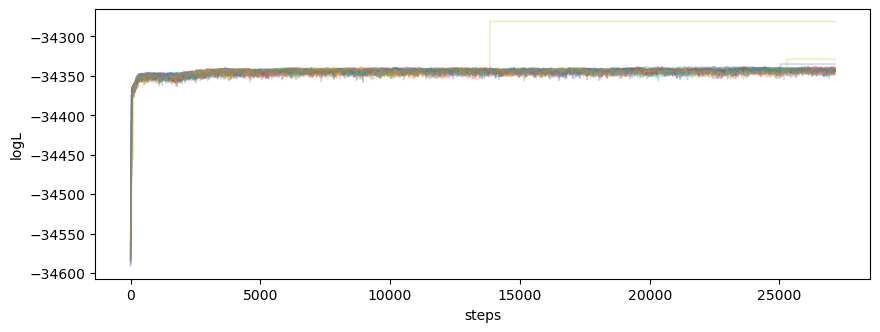

In [6]:
fig, ax1= plt.subplots(1, 1)

fig.set_size_inches(10,3.5)

ax1.plot(log_prob_noflat,alpha=0.3,linewidth=1)
ax1.set_ylabel('logL')
ax1.set_xlabel('steps')
#ax1.set_ylim((-34250,-34170))

#plt.savefig('Au23_logL_i45.pdf',format='pdf')

NameError: name 'log_prob_noflat' is not defined

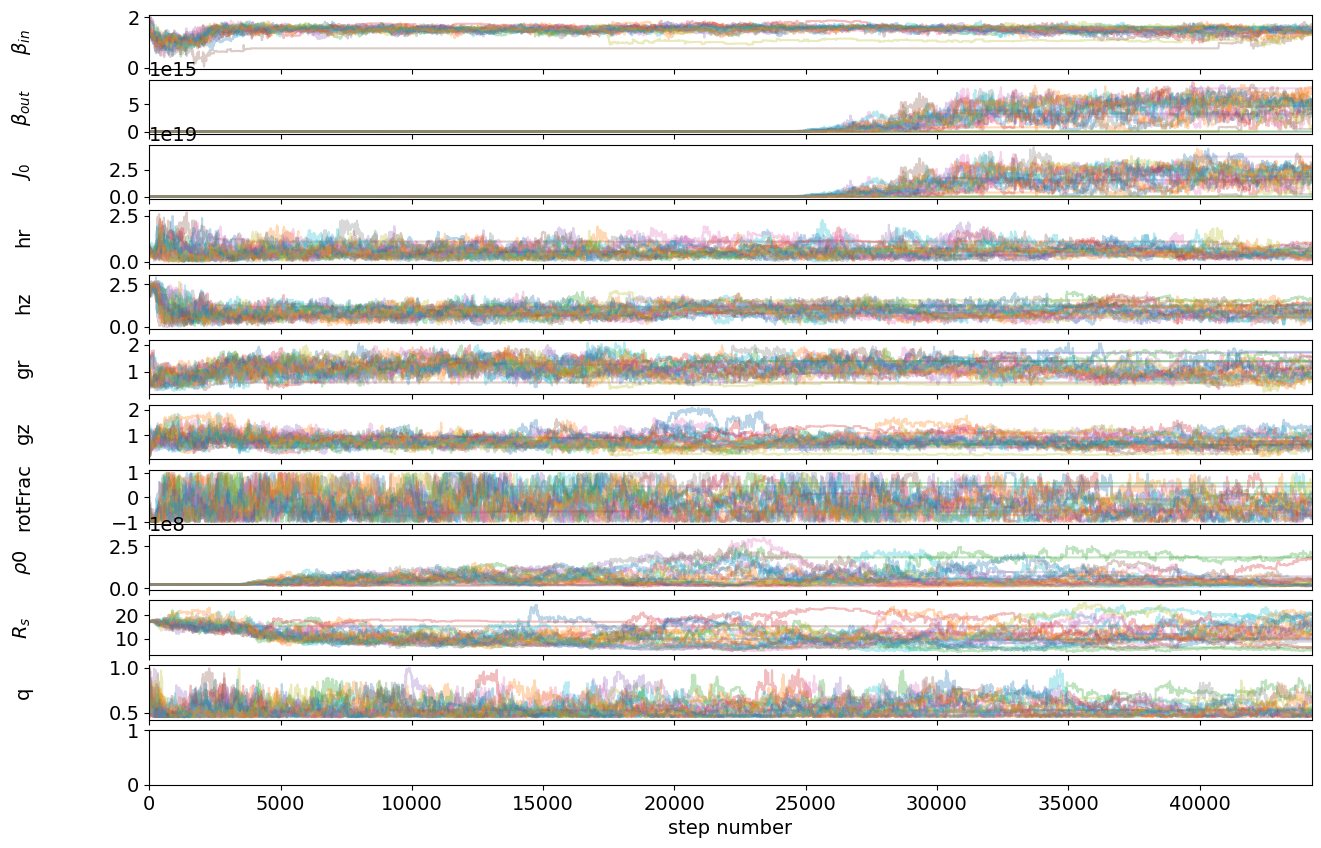

In [4]:
# Plot chains

# Chains

nsteps = len(samples)
ndim = 11
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(ndim+1, figsize=(15, 10), sharex=True)
true_val =  np.array([2.5, 5.5, 8000, 0.75, 1.7, 0.88, 1.1, 0.5, 1.1*(10**7), 17., 0.8])
a = [x for x in range(0, nsteps)]
a = np.array(a)
for i in range(ndim):
    ax = axes[i]
    #ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.plot(samples[:, :, i], alpha=0.3)
    #b = [true_val[i] for x in range(0,nsteps)]
    #b = np.array(b)
    #ax.plot(a[i], true_val[i],color='red')
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("step number")
    
axes[ndim].plot(log_prob_noflat,alpha=0.3)
axes[ndim].set_ylabel('logL')
axes[ndim].set_xlim(0, len(samples))
axes[ndim].set_ylim((-34250,-34170)) #i=0



#plt.savefig('Au23_chains_i90.pdf',format='pdf')

ValueError: Contour levels must be increasing

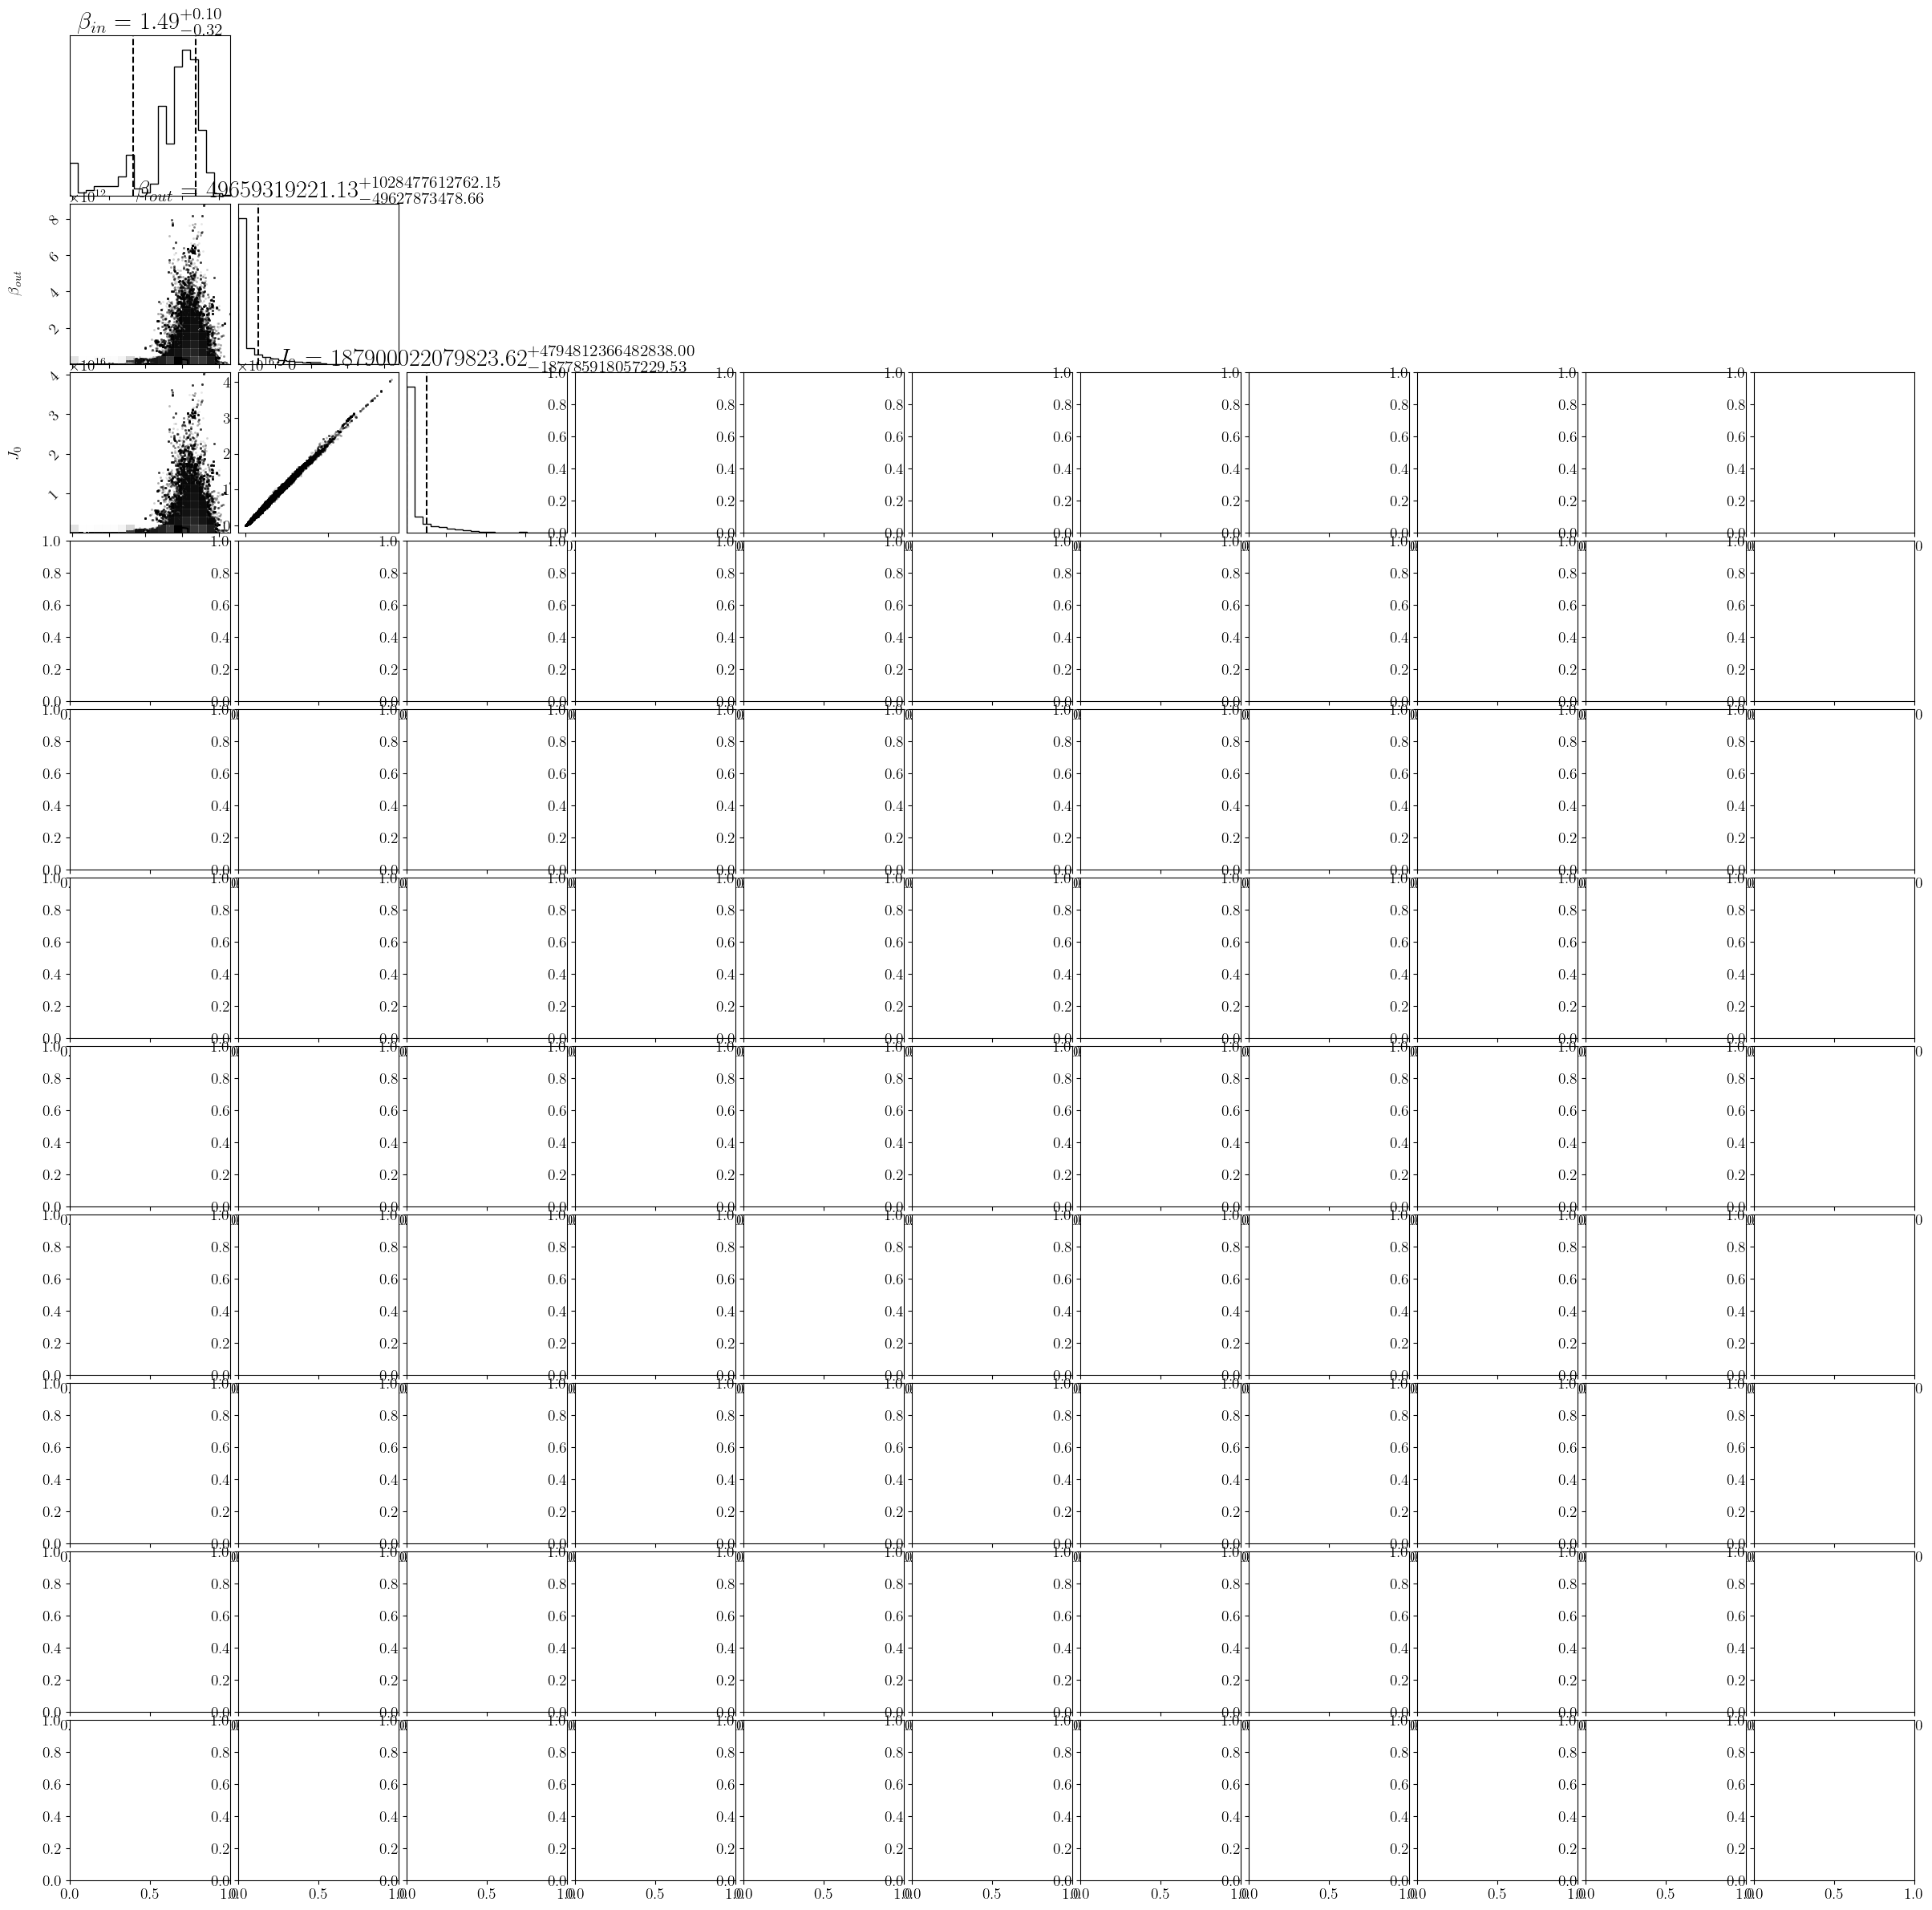

In [10]:
# Plot corner-plots

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'axes.titlesize': 22,"axes.labelpad":10})
reader = emcee.backends.HDFBackend(backend_file, read_only=True)
samples = reader.get_chain(discard=27000,flat=True)
#truths = [2.5,5.5,10000.,0.75,1.7,0.88,1.1,0.5,1.1*(10**7),16.5,0.8]
#fig = corner.corner(samples, labels=labels, truths=truths, truth_color='red', quantiles=(0.16, 0.84), levels=(1-np.exp(-0.5),),show_titles=True)
fig = corner.corner(samples, labels=labels, quantiles=(0.16, 0.84), levels=(1-np.exp(-0.5),),show_titles=True)


fig.tight_layout()


# for control of labelsize of x,y-ticks:
for ax in fig.get_axes():  
    ax.tick_params(axis='both', labelsize=14,pad=1)
    ax.xaxis.label.set_size(23)
    ax.yaxis.label.set_size(23)
#plt.savefig('Au23_corner_i0.pdf',format='pdf',bbox_inches='tight')

In [5]:
# Get best-fit parameters (13 param)
samp_flat = reader.get_chain(discard=40000,flat=True)
log_prob_flat_samples  = reader.get_log_prob(discard=40000,flat=True)

# Find best-fit param (13 param)
n_best_fit        = np.where(log_prob_flat_samples==np.max(log_prob_flat_samples))
n_best_fit_single = n_best_fit[0][0]
pars_best = samp_flat[n_best_fit_single,:]

In [6]:
slopein_best  = pars_best[0]
slopeout_best = pars_best[1]
J0_best       = pars_best[2]
hr_best       = pars_best[3]
hz_best       = pars_best[4]
gr_best       = pars_best[5]
gz_best       = pars_best[6]
rotFrac_best  = pars_best[7]
rho0_best      = pars_best[8]
Rs_best       = pars_best[9]
q_best        = pars_best[10]
#alpha_best    = pars_best[11]
#alpha_best = 200.
#beta_best     = pars_best[12]
#gamma_best    = pars_best[13]


slopein_fits = samp_flat[:,0]
slopeout_fits = samp_flat[:,1]
J0_fits   = samp_flat[:,2]
hr_fits   = samp_flat[:,3]
hz_fits   = samp_flat[:,4]
gr_fits   = samp_flat[:,5]
gz_fits   = samp_flat[:,6]
rotFrac_fits = samp_flat[:,7]
rho0_fits = samp_flat[:,8]
Rs_fits   = samp_flat[:,9]
q_fits   = samp_flat[:,10]
#alpha_fits = samp_flat[:,11]
#beta_fits  = samp_flat[:,12]
#gamma_fits = samp_flat[:,13]


In [9]:
n=2000

slopein = slopein_fits[0::n]
slopeout = slopeout_fits[0::n]
J0 = J0_fits[0::n]
hr = hr_fits[0::n]
hz = hz_fits[0::n]
gr = gr_fits[0::n]
gz = gz_fits[0::n]
rotFrac = rotFrac_fits[0::n]
rho0 = rho0_fits[0::n]
Rs = Rs_fits[0::n]
q  = q_fits[0::n]

print(len(slopein))

31


In [10]:
print(slopein_best)
print(slopeout_best)
print(J0_best)
print(hr_best)
print(hz_best)
print(gr_best)
print(gz_best)
print(rotFrac_best)
print(rho0_best/(10**7))
print(Rs_best)
print(q_best)

1.388767399057824
113071660242.03104
393628739625147.4
0.23122029837936497
0.6090502124372245
0.6496267264130131
0.38334168153643755
-0.5531832235638241
0.7100841749355356
22.179753844503573
0.555696377636284


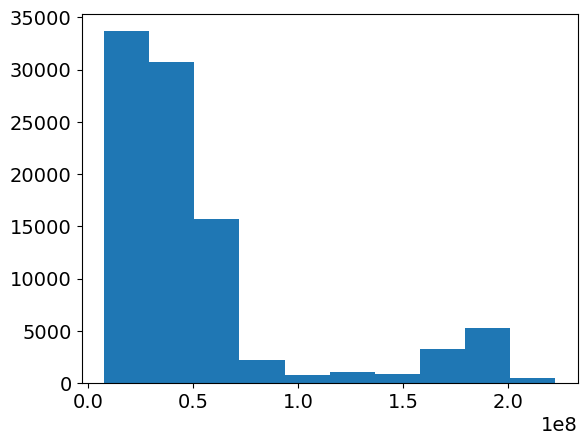

In [7]:
hist, bins, _ = plt.hist(rho0_fits, bins=10)
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

In [8]:
# Calculate median
median = 50.
onesig_lo = 15.865
onesig_hi = 84.135
twosig_lo = 2.275
twosig_hi = 97.725

rho0_med = np.percentile(rho0_fits, median)
Rs_med = np.percentile(Rs_fits, median)
q_med = np.percentile(q_fits, median)

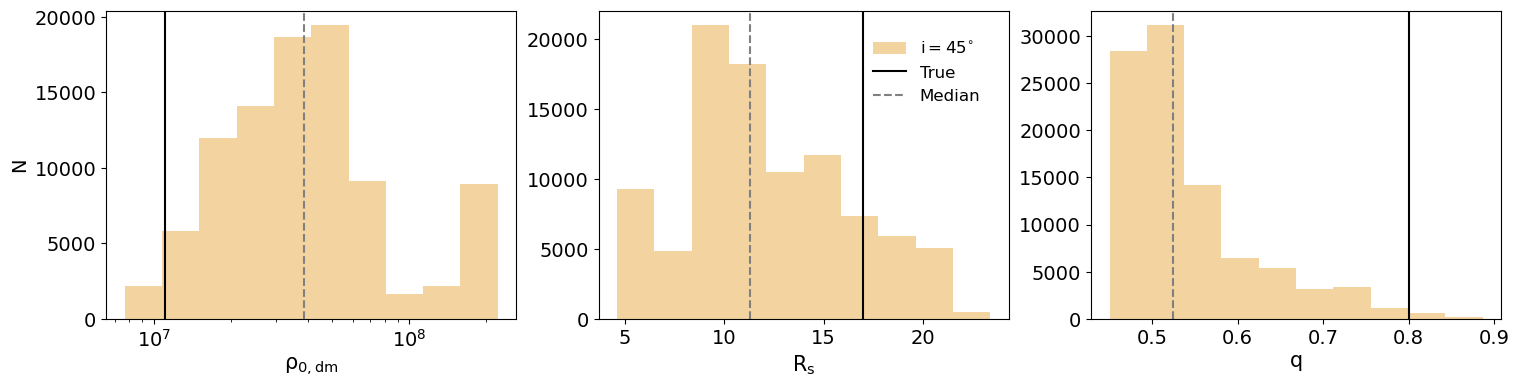

In [9]:
fig, (ax1,ax2,ax3)= plt.subplots(1, 3)
fig.set_size_inches(18,4)
color0 = '#84a59d' 
color45 = '#f2cc8f' 
color90 = '#e78f8e'

color = color45
alpha = 0.85

ax1.hist(rho0_fits, bins=logbins,histtype='stepfilled',color=color,alpha=alpha)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.axvline(x = 1.1*(10**7),c='black',label='True')
ax1.axvline(x = rho0_med,linestyle='--',c='grey',label='Median')
ax1.set_xlabel(r'$\mathrm{\rho_{0,dm}}$',fontsize=15)
ax1.set_ylabel(r'N',fontsize=14)
ax1.set_xscale('log')
#ax1.legend(frameon=False)

ax2.hist(Rs_fits, bins=10,histtype='stepfilled',color=color,alpha=alpha,label = r'$\mathrm{i=45^{\circ}}$')
ax2.axvline(x = 17,c='black',label='True')
ax2.axvline(x = Rs_med,linestyle='--',c='grey',label='Median')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xlabel(r'$\mathrm{R_{s}}$',fontsize=15)
ax2.legend(bbox_to_anchor=(0.8, 0.8), loc='center',frameon=False,bbox_transform=ax2.transAxes,fontsize=12)
#ax2.set_xlim((0,18))
#ax2.set_ylabel(r'N',fontsize=12)
#ax2.set_xscale('log')

ax3.hist(q_fits, bins=10,histtype='stepfilled',color=color,alpha=alpha)
ax3.axvline(x = 0.8,c='black')
ax3.axvline(x = q_med,linestyle='--',c='grey')
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.set_xlabel(r'$\mathrm{q}$',fontsize=15)
#ax3.set_ylabel(r'N',fontsize=12)
#ax2.set_xscale('log')



plt.savefig('DM_param_posterior_Au23_i45_percentile.pdf',format='pdf',bbox_inches='tight')

### Test Auriga potential (from simulations & derived)

### Compare potentials

In [20]:
# Disk and bulge potentials (fixed)
Rd = 5.799  # disk scale radius
Md = 6.804*(10**10.)  # disk mass
Rb = 0.871  # bulge effective radius
Mb = 1.442 *(10**10.)
nb = 1.021   # bulge Sersic index

POT_BULGE = agama.Potential(type='Sersic',
                            mass=Mb,
                            scaleRadius=Rb,
                            sersicIndex=nb)

POT_DISK = agama.Potential(type='Sersic',
                           mass=Md,
                           scaleRadius=Rd,
                           sersicIndex=1.)
# Potential best-fit
pars_DMhalo_best = dict(type='Spheroid',
                densityNorm=rho0_best,
                #densityNorm = 1.2*(10**7),
#                 gamma=gamma_best,
#                 beta=beta_best,
#                 alpha=alpha_best,
                        gamma = 1.,
                        beta = 3.,
                        alpha=1.,
                scaleRadius = Rs_best,
                outercutoffradius=1000000.,
                axisRatioZ = q_best)
pot_dm_best = agama.Potential(**pars_DMhalo_best)
pot_best = agama.Potential(POT_DISK,POT_BULGE,pot_dm_best)

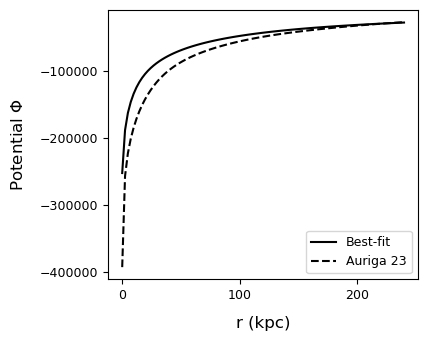

In [30]:
plt.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize=(4, 3.5))


rgrid   = np.linspace(0.1, 240.0, 100)
rgrid_  = np.column_stack((rgrid,rgrid*0.,rgrid*0.))
k=0

# rAu_grid = np.column_stack((xAu,yAu,zAu))
# rAu = np.sqrt(xAu**2.+yAu**2.+zAu**2.)
# plt.rcParams['xtick.labelsize']=12
# plt.rcParams['ytick.labelsize']=12

#plt.rcParams['text.usetex'] = False


# for i in range(len(rho0)):
#     pars_DMhalo = dict(type='Spheroid',
#                     densityNorm=rho0[i],
#                     gamma=1.,
#                     beta=3.,
#                     alpha=1.,
#                     scaleRadius = Rs[i],
#                     outercutoffradius=1000000.,
#                     axisRatioZ = q[i])
#     pot_disk_ = agama.Potential(type='Disk',
#                            #mass=5.6*(10**10),
#                            mass = massd[i],
#                            scaleRadius=7.7*k_disk,
#                           scaleHeight=5.0)
#                           #scaleHeight=3.0)
#     pot_bulge_ = agama.Potential(type='Sersic',
#                     #mass=3.1*(10**10),
#                     mass=massb[i],
#                     scaleRadius = 1.155,
#                     #scaleRadius = 3.,
#                     #scaleRadius = 1.5,
#                     sersicIndex=2.7,
#                     axisRatioZ=0.72)
#     potDM = agama.Potential(**pars_DMhalo)
#     pot_ = agama.Potential(pot_disk_,pot_bulge_,potDM)
#     plt.plot(rgrid,pot_.potential(rgrid_),c='grey',alpha=0.2)

plt.plot(rgrid,pot_best.potential(rgrid_),c='black',label = 'Best-fit')
plt.plot(rgrid,pot_totAu.potential(rgrid_),'--',c='black',label = 'Auriga 23')
# plt.scatter(rAu,pot_best.potential(rAu_grid),s=5,c='black',label = 'Best-fit')
# plt.scatter(rAu,pot_totAu.potential(rAu_grid),s=5,c='red',label = 'Auriga derived')
#plt.scatter(rAu,potAu,s=5,label='Auriga')
plt.xlabel('r (kpc)',fontsize=12)
plt.ylabel(r'Potential $\Phi$',fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9,loc = 'lower right')
#plt.savefig('Au23_potential_6d.pdf',format='pdf',bbox_inches='tight')

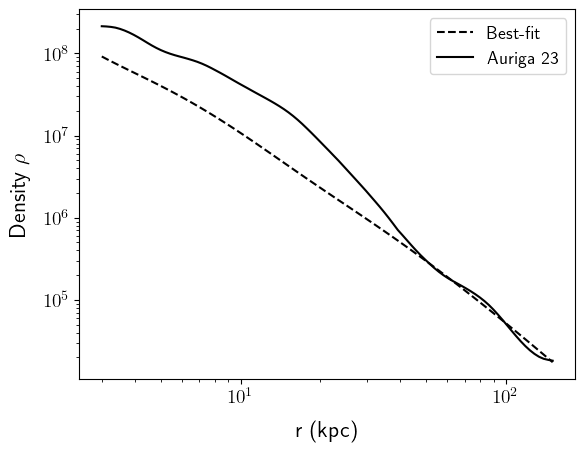

In [31]:
#rgrid   = np.linspace(0.16, 240.0, 100)
rgrid   = np.logspace(np.log10(3), np.log10(150.0), 100)

rgrid_  = np.column_stack((rgrid,rgrid*0.,rgrid*0.))
k=0
# plt.rcParams['xtick.labelsize']=12
# plt.rcParams['ytick.labelsize']=12

plt.rcParams['text.usetex'] = True



# for i in range(len(rho0)):
#     pars_DMhalo = dict(type='Spheroid',
#                     densityNorm=rho0[i],
#                     gamma=1.,
#                     beta=3.,
#                     alpha=1.,
#                     scaleRadius = Rs[i],
#                     outercutoffradius=1000000.,
#                     axisRatioZ = q[i])
#     potDM = agama.Potential(**pars_DMhalo)
#     pot_ = agama.Potential(POT_DISK,POT_BULGE,potDM)
#     plt.plot(rgrid,pot_.density(rgrid_),c='grey',alpha=1)

plt.plot(rgrid,pot_best.density(rgrid_),'--',c='black',label = 'Best-fit')
plt.plot(rgrid,pot_totAu.density(rgrid_),c='black',label = 'Auriga 23')

# plt.scatter(rgrid,pot_best.density(rgrid_),s=5,c='black',label = 'Best-fit')
# plt.scatter(rgrid,pot_totAu.density(rgrid_),s=5,c='red',label = 'Auriga 24')
plt.xlabel('r (kpc)',fontsize=16)
plt.ylabel(r'Density $\rho$',fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,loc = 'upper right')
#plt.savefig('Au21_density_new.pdf',format='pdf',bbox_inches='tight')
#plt.savefig('density_115bulge_genNFW.pdf',format='pdf',bbox_inches='tight')

In [ ]:
np.savetxt('dens_tot_Au23_new.txt',pot_totAu.density(rgrid_))
np.savetxt('dens_tot_best_Au23_new.txt',pot_best.density(rgrid_))
np.savetxt('r_dens_tot_Au23_new.txt',rgrid)

In [17]:
# Density but spherically averaged
rgrid   = np.logspace(np.log10(1.), np.log10(150.0), 30)

dens_avg = []
for i in range(len(rgrid)):
    dens_ = ut.mean_density(pot_totAu, rgrid[i])
    dens_avg.append(dens_)
    
# dens_avg_best = []
# for i in range(len(rgrid)):
#     dens_ = ut.mean_density(pot_best, rgrid[i])
#     dens_avg_best.append(dens_)

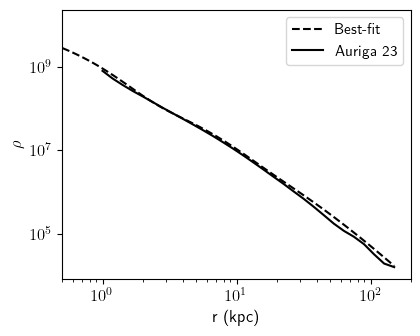

In [18]:
plt.figure(figsize=(4.5, 3.5))
rgrid_old   = np.logspace(np.log10(0.1), np.log10(150.0), 100)


#plt.plot(rgrid,dens_avg_best,'--',c='black',label = 'Best-fit')
plt.plot(rgrid_old,pot_best.density(rgrid_),'--',c='black',label = 'Best-fit')
plt.plot(rgrid,dens_avg,c='black',label = 'Auriga 23')
# plt.scatter(rgrid,pot_best.density(rgrid_),s=5,c='black',label = 'Best-fit')
# plt.scatter(rgrid,pot_totAu.density(rgrid_),s=5,c='red',label = 'Auriga 24')
plt.xlabel('r (kpc)',fontsize=12)
plt.ylabel(r'$\rho$',fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim((0.5,200))
plt.legend(fontsize=11,loc = 'upper right')

#plt.savefig('Au23_dens_tot_sph_avg_6d.pdf',format='pdf',bbox_inches='tight')

In [12]:
np.savetxt('dens_tot_Au24_avg_rev.txt',dens_avg)
np.savetxt('dens_tot_best_Au24_avg_rev.txt',dens_avg_best)
np.savetxt('r_dens_tot_Au24_avg_rev.txt',rgrid)

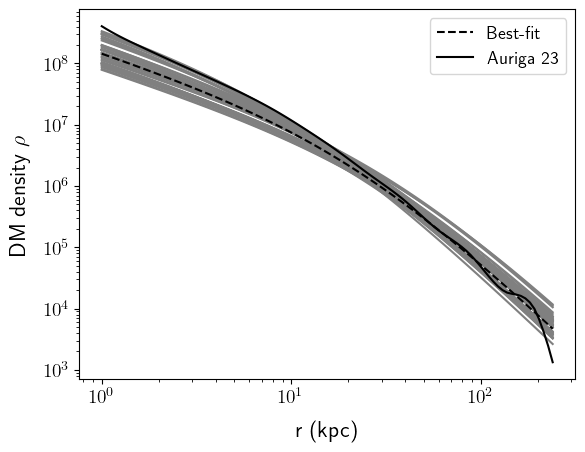

In [32]:
# DM halo density profile comparison

#rgrid   = np.linspace(0.001, 240.0, 100)
rgrid   = np.logspace(np.log10(1.), np.log10(240.0), 100)

rgrid_  = np.column_stack((rgrid,rgrid*0.,rgrid*0.))
k=0
# plt.rcParams['xtick.labelsize']=12
# plt.rcParams['ytick.labelsize']=12

plt.rcParams['text.usetex'] = True


for i in range(len(rho0)):
    pars_DMhalo = dict(type='Spheroid',
                    densityNorm=rho0[i],
                    gamma=1,
                    beta=3.,
                    alpha=1.,
                    scaleRadius = Rs[i],
                    outercutoffradius=1000000.,
                    axisRatioZ = q[i])
    potDM = agama.Potential(**pars_DMhalo)
    pot_ = agama.Potential(potDM)
    plt.plot(rgrid,pot_.density(rgrid_),c='grey',alpha=1.)

plt.plot(rgrid,pot_dm_best.density(rgrid_),'--',c='black',label = 'Best-fit')
plt.plot(rgrid,pot_dmAu.density(rgrid_),c='black',label = 'Auriga 23')
plt.xlabel('r (kpc)',fontsize=16)
plt.ylabel(r'DM density $\rho$',fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,loc = 'upper right')
#plt.savefig('Au23_dens_dm_6d.pdf',format='pdf',bbox_inches='tight')

In [ ]:
np.savetxt('dens_DM_best_Au23_new.txt',pot_dm_best.density(rgrid_))
np.savetxt('den_DM_Au23_new.txt',pot_dmAu.density(rgrid_))
np.savetxt('r_dens_DM_Au23_new.txt',rgrid)

In [32]:
# DM density but spherically averaged
rgrid   = np.logspace(np.log10(1.), np.log10(150.0), 30)

dens_avg = []
for i in range(len(rgrid)):
    dens_ = ut.mean_density(pot_dmAu, rgrid[i])
    dens_avg.append(dens_)
    
dens_avg_best = []
for i in range(len(rgrid)):
    dens_ = ut.mean_density(pot_dm_best, rgrid[i])
    dens_avg_best.append(dens_)

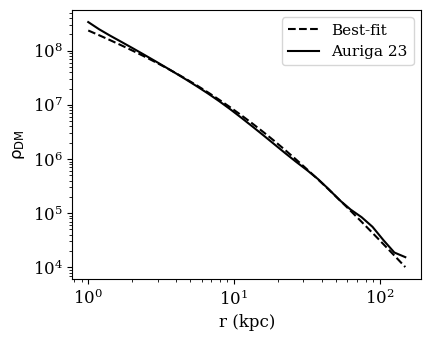

In [34]:
plt.figure(figsize=(4.5, 3.5))


plt.plot(rgrid,dens_avg_best,'--',c='black',label = 'Best-fit')
plt.plot(rgrid,dens_avg,c='black',label = 'Auriga 23')
# plt.scatter(rgrid,pot_best.density(rgrid_),s=5,c='black',label = 'Best-fit')
# plt.scatter(rgrid,pot_totAu.density(rgrid_),s=5,c='red',label = 'Auriga 24')
plt.xlabel('r (kpc)',fontsize=12)
plt.ylabel(r'$\mathrm{\rho_{DM}}$',fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=11,loc = 'upper right')
plt.savefig('Au23_dens_dm_6d.pdf',format='pdf',bbox_inches='tight')

In [12]:
np.savetxt('dens_DM_best_Au24_avg_rev.txt',dens_avg_best)
np.savetxt('den_DM_Au24_avg_rev.txt',dens_avg)
np.savetxt('r_dens_DM_Au24_avg_rev.txt',rgrid)

### Enclosed mass comparison

#### Total enclosed mass profile

In [33]:
#r = np.logspace(np.log10(1.),np.log10(200),50)

# r = np.array([1.,2,3,4,5,6,7,8,9,10,13,16,19,22,25,28,30,33,36,39,42,45,48,50,55,60,65,
#               70,70,75,80,95,100,106,112,118,125,130,139,144,150])

r   = np.logspace(np.log10(1), np.log10(150.0), 100)

r_  = np.column_stack((rgrid,rgrid*0.,rgrid*0.))

#r = np.logspace(np.log10(1.),np.log10(200),10)


# # Enclosed mass profile for best-fit model
# M_best = []
# delta_M_best = []
# for i in range(len(r)):
#     M_ = ut.enclosed_mass(pot_best, r[i])
#     M_best.append(M_)

# M_best = np.array(M_best)
# #delta_M_best = np.array(delta_M_best)


# # Enclosed mass profile for Auriga
# M_Au = []
# delta_M_Au = []
# for i in range(len(r)):
#     M_ = ut.enclosed_mass(pot_totAu, r[i])
#     M_Au.append(M_)
# #     M_Au.append(M_[0])
# #     delta_M_Au.append(M_[1])

# M_Au = np.array(M_Au)



M_best = pot_best.enclosedMass(r)

M_best = np.array(M_best)
#delta_M_best = np.array(delta_M_best)


# Enclosed mass profile for Auriga
M_Au = pot_totAu.enclosedMass(r)
#     M_Au.append(M_[0])
#     delta_M_Au.append(M_[1])

M_Au = np.array(M_Au)



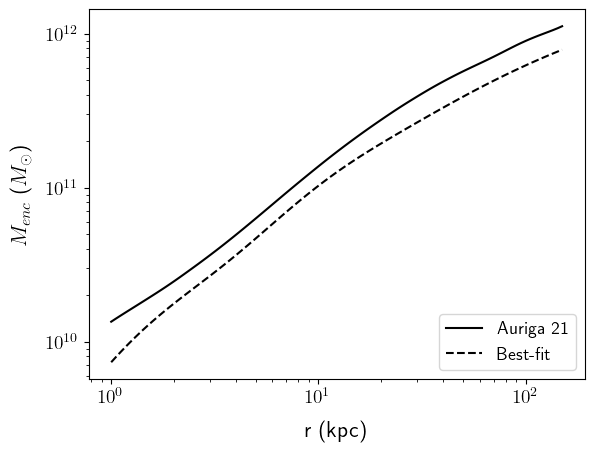

In [34]:
# for i in range(len(M_conf)):
#     plt.plot(r,M_conf[i],c='grey')
plt.plot(r,M_Au,label = 'Auriga 21',c='black')
plt.plot(r,M_best,'--',label='Best-fit',c='black')
plt.xlabel('r (kpc)',fontsize=16)
plt.ylabel(r'$M_{enc}$ ($M_\odot$)',fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,loc = 'lower right')
#plt.savefig('Au21_totencmass_new.pdf',format='pdf',bbox_inches='tight')
#plt.savefig('encmass_115bulge_genNFW.pdf',format='pdf',bbox_inches='tight')

In [16]:
np.savetxt('encmass_tot_best_Au24_rev.txt',M_best)
np.savetxt('encmass_tot_Au24_rev.txt',M_Au)
np.savetxt('r_encmass_tot_Au24_rev.txt',r)

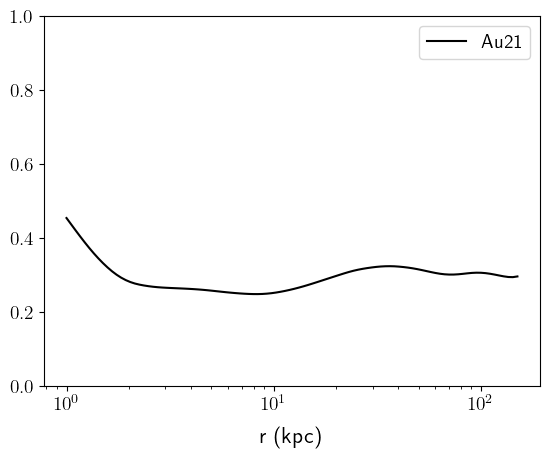

In [35]:
# Fractional difference plot
frac_diff =  np.abs((M_best-M_Au)/M_Au)
#frac_diff =  (M_best-M_Au)/M_Au


plt.plot(r,frac_diff,c='black',label='Au21')
plt.ylabel(r'% diff',fontsize=16)
plt.xlabel('r (kpc)',fontsize=16)
#plt.xlim((-1,150))
plt.ylim((0,1.))
plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
#plt.legend(fontsize=13,loc = 'upper right')
#plt.savefig('Au21_fracdiff_tot_new.pdf',format='pdf',bbox_inches='tight')
#plt.savefig('fracdiff_115bulge_genNFW_2.pdf',format='pdf',bbox_inches='tight')

#### DM enclosed mass profile

In [39]:
#r = np.logspace(np.log10(1.),np.log10(150),30)
#r = np.linspace(1.,150,30)

# r = np.array([1.,2,3,4,5,6,7,8,9,10,13,16,19,22,25,28,30,33,36,39,42,45,48,50,55,60,65,
#               70,70,75,80,95,100,106,112,118,125,139,144,150])

r   = np.logspace(np.log10(1.), np.log10(200), 50)

r_  = np.column_stack((rgrid,rgrid*0.,rgrid*0.))

# Enclosed mass profile for best-fit model
M_best_dm = []
for i in range(len(r)):
    M_ = ut.enclosed_mass(pot_dm_best, r[i])
    M_best_dm.append(M_)

M_best_dm = np.array(M_best_dm)


# Enclosed mass profile for Auriga
M_Au_dm = []
for i in range(len(r)):
    M_ = ut.enclosed_mass(pot_dmAu, r[i])
    M_Au_dm.append(M_)

M_Au_dm = np.array(M_Au_dm)


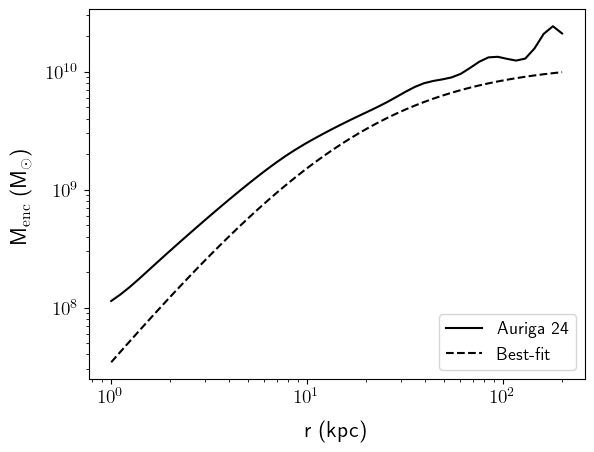

In [40]:
plt.plot(r,M_Au_dm,label = 'Auriga 24',c='black')
plt.plot(r,M_best_dm,'--',label='Best-fit',c='black')
plt.xlabel('r (kpc)',fontsize=16)
plt.ylabel(r'M$_{\mathrm{enc}}$ (M$_\odot$)',fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13,loc = 'lower right')
#plt.savefig('Au24_DMencmass_new.pdf',format='pdf',bbox_inches='tight')
#plt.savefig('encmass_115bulge_genNFW.pdf',format='pdf',bbox_inches='tight')

In [41]:
np.savetxt('encmass_DM_best_Au24_rev.txt',M_best)
np.savetxt('encmass_DM_Au24_rev.txt',M_Au)
np.savetxt('r_encmass_DM_Au24_rev.txt',r)

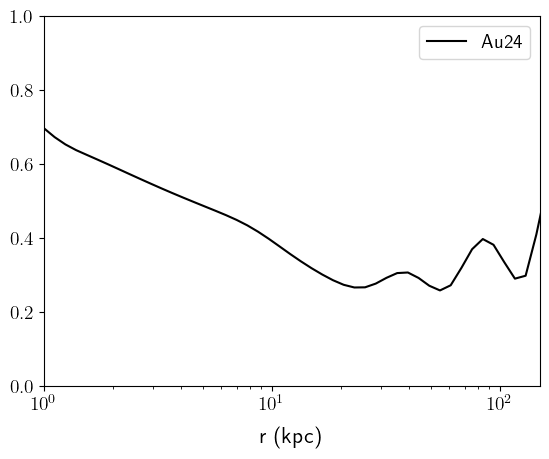

In [43]:
# Fractional difference plot
frac_diff =  np.abs((M_best_dm-M_Au_dm)/M_Au_dm)
#frac_diff =  (M_best-M_Au)/M_Au


plt.plot(r,frac_diff,c='black',label='Au24')
plt.ylabel(r'% diff',fontsize=16)
plt.xlabel('r (kpc)',fontsize=16)
plt.ylim((0.,1.))
plt.xlim((1,150))
plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
#plt.legend(fontsize=13,loc = 'upper right')
#plt.savefig('Au24_DMfracdiff_new.pdf',format='pdf',bbox_inches='tight')
#plt.savefig('fracdiff_115bulge_genNFW_2.pdf',format='pdf',bbox_inches='tight')

### Velocity dispersion and anisotropy profiles

In [31]:
# Read in smooth halo

#data_lowmet = np.loadtxt('data_smooth_6d_Au23_1000_sampled.txt')
data_lowmet = np.loadtxt('Au23_lowmet_0.0005-0.001.txt')
x_ = data_lowmet[:,0]
y_ = data_lowmet[:,1]
z_ = data_lowmet[:,2]
vx_ = data_lowmet[:,3]
vy_ = data_lowmet[:,4]
vz_ = data_lowmet[:,5]


In [32]:
# Distribution function (best-fit)
df_best = agama.DistributionFunction(type ='DoublePowerLaw',
                                norm=1,
                                slopeIn=slopein_best,
                                slopeOut = slopeout_best,
                                J0=J0_best,
                                coefJrIn = hr_best,
                                coefJzIn=hz_best,
                                coefJrOut=gr_best,
                                coefJzOut=gz_best,
                                rotFrac = rotFrac_best,
                                Jcutoff=50000.) 

gm = agama.GalaxyModel(pot_best,df_best)
#data_best_sample,_ = gm.sample(len(xAu))
data_best_sample,_ = gm.sample(len(x_))

### Number density

In [33]:
#stars_sims = np.column_stack((xAu,yAu,zAu,vxAu,vyAu,vzAu))
stars_sims_lowmet = np.copy(data_lowmet)
stars_sims = np.copy(stars_sims_lowmet)
stars_model = np.copy(data_best_sample)

In [ ]:
pos_sims,ndens_sims = bm.number_desnity_binning(stars_sims,50)
pos_sims_lowmet,ndens_sims_lowmet = bm.number_desnity_binning(stars_sims_lowmet,50)
pos_model,ndens_model = bm.number_desnity_binning(stars_model,50)

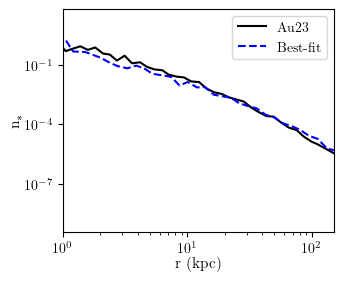

In [67]:
plt.figure(figsize=(3.5, 2.9))

nsims = len(stars_sims)
nmodel = len(stars_model)

plt.plot(pos_sims,ndens_sims,c='black',linewidth=1.5,label = 'Au23')
#plt.scatter(pos_sims,ndens_sims,label = 'Au23',c='black',s=5)
plt.plot(pos_model,ndens_model,'--',c='blue',linewidth=1.5,label = 'Best-fit')
#plt.scatter(pos_model,ndens_model,s=5,label='Best-fit',c='blue',linewidth=1.5)

plt.xlabel('r (kpc)',fontsize=11,labelpad=1)
plt.ylabel(r'n$_{*}$',fontsize=11,labelpad=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xscale('log')
plt.yscale('log')
plt.xlim((1,150))
#plt.ylim((10**(-4),(10**4.)))
plt.legend(fontsize=10,loc = 'upper right')
plt.savefig('ndens_Au23_smooth.pdf',format='pdf',bbox_inches='tight')

### Vel disperions

In [34]:
pos_sims,sigvx_sims,sigvy_sims,sigvz_sims,sigvx_err_sims,sigvy_err_sims,sigvz_err_sims = bm.vel_dispersion_cartesian_error(stars_sims,30)

#pos_sims,sigvr_sims,sigvt_sims,sigvp_sims = bm.vel_dispersion_spherical_binning(stars_sims,20,True)
pos_model,sigvx_model,sigvy_model,sigvz_model,sigvx_err_model,sigvy_err_model,sigvz_err_model = bm.vel_dispersion_cartesian_error(stars_model,
                                                                                                                                  30)

# sigv_model = gm.moments(pos_sims, dens=False,vel = False,vel2 = True)

# sigvx_model = np.sqrt(sigv_model[:,0])
# sigvy_model = np.sqrt(sigv_model[:,1])
# sigvz_model = np.sqrt(sigv_model[:,2])

1
1
3
6
13
28
71
131
253
327
521
765
1159
1695
2398
3450
4678
6322
7722
8779
9045
9572
10436
10025
9108
8254
6583
5605
4506
3568
6
6
10
19
42
81
126
229
401
598
971
1599
2297
3576
4991
6808
8572
10538
12174
12998
13229
11818
9635
6855
4184
2082
841
270
61
7


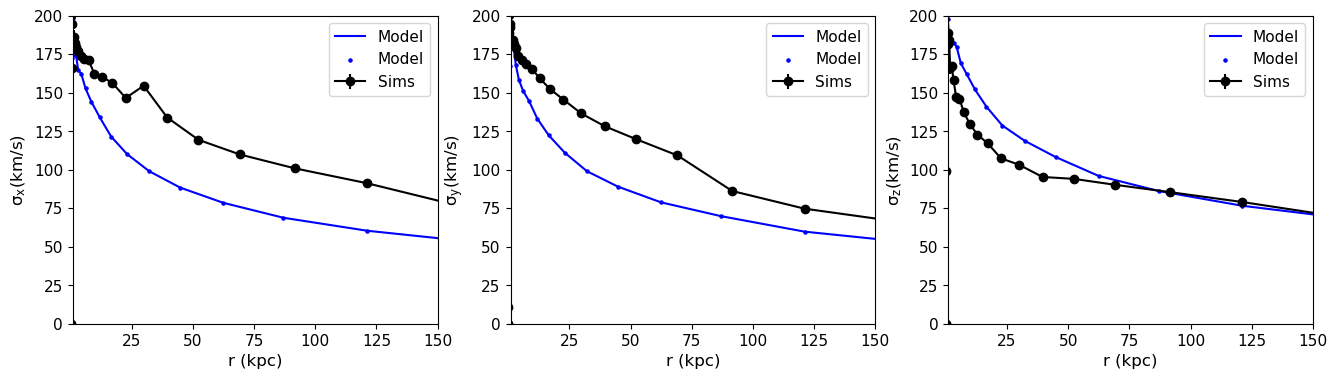

In [35]:
fig, (ax1, ax2, ax3)= plt.subplots(1, 3)
fig.set_size_inches(16,4)


#ax1.plot(pos_sims,sigvr_sims,'--',label='Sims',c='blue')
ax1.errorbar(pos_sims, sigvx_sims, yerr=sigvx_err_sims, marker='o',color='black', linestyle='-',label='Sims')
#ax1.plot(pos_sims, sigvx_sims,c='black')
ax1.plot(pos_model,sigvx_model,label='Model',c='blue')
ax1.scatter(pos_model,sigvx_model,label='Model',c='blue',s=5)

# ax1.scatter(pos_model,sigvr_model,s=5,c='black')
# ax1.scatter(pos_sims,sigvr_sims,s=5,c='blue')
ax1.legend(fontsize=11)
ax1.set_xlim((1,150))
ax1.set_ylim((0,200.))
ax1.set_xlabel('r (kpc)',fontsize=12)
ax1.set_ylabel(r'$\mathrm{\sigma_{x} (km/s)}$',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=11)
#ax1.tick_params(axis='both', which='minor', labelsize=11)
#ax1.set_xscale('log')
#ax1.set_yscale('log')


#ax1.plot(pos_sims,sigvr_sims,'--',label='Sims',c='blue')
ax2.errorbar(pos_sims, sigvy_sims, yerr=sigvy_err_sims, marker='o',color='black', linestyle='-',label='Sims')
#ax1.plot(pos_sims, sigvx_sims,c='black')
ax2.plot(pos_model,sigvy_model,label='Model',c='blue')
ax2.scatter(pos_model,sigvy_model,label='Model',c='blue',s=5)

# ax1.scatter(pos_model,sigvr_model,s=5,c='black')
# ax1.scatter(pos_sims,sigvr_sims,s=5,c='blue')
ax2.legend(fontsize=11)
ax2.set_xlim((1,150))
ax2.set_ylim((0,200.))
ax2.set_xlabel('r (kpc)',fontsize=12)
ax2.set_ylabel(r'$\mathrm{\sigma_{y} (km/s)}$',fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=11)
#ax1.tick_params(axis='both', which='minor', labelsize=11)
#ax1.set_xscale('log')
#ax1.set_yscale('log')

ax3.errorbar(pos_sims, sigvz_sims, yerr=sigvz_err_sims, marker='o',color='black', linestyle='-',label='Sims')
#ax1.plot(pos_sims, sigvx_sims,c='black')
ax3.plot(pos_model,sigvz_model,label='Model',c='blue')
ax3.scatter(pos_model,sigvz_model,label='Model',c='blue',s=5)

# ax1.scatter(pos_model,sigvr_model,s=5,c='black')
# ax1.scatter(pos_sims,sigvr_sims,s=5,c='blue')
ax3.legend(fontsize=11)
ax3.set_xlim((1,150))
ax3.set_ylim((0,200.))
ax3.set_xlabel('r (kpc)',fontsize=12)
ax3.set_ylabel(r'$\mathrm{\sigma_{z} (km/s)}$',fontsize=12)
ax3.tick_params(axis='both', which='major', labelsize=11)
#ax1.tick_params(axis='both', which='minor', labelsize=11)
#ax1.set_xscale('log')
#ax1.set_yscale('log')



plt.savefig('veldisp_Au23_i0_lowmet.pdf',format='pdf',bbox_inches='tight')

### Anisotropy

In [57]:
sigvr_sims = np.array(sigvr_sims)
sigvt_sims = np.array(sigvt_sims)
sigvp_sims = np.array(sigvp_sims)
sigvr_model = np.array(sigvr_model)
sigvt_model = np.array(sigvt_model)
sigvp_model = np.array(sigvp_model)

beta_sims = 1-((sigvt_sims**2.+sigvp_sims**2.)/(2*sigvr_sims**2))
beta_model = 1-((sigvt_model**2.+sigvp_model**2.)/(2*sigvr_model**2))

/tmp/ipykernel_44223/4210051166.py:8: RuntimeWarning: invalid value encountered in divide
  beta_sims = 1-((sigvt_sims**2.+sigvp_sims**2.)/(2*sigvr_sims**2))
/tmp/ipykernel_44223/4210051166.py:9: RuntimeWarning: invalid value encountered in divide
  beta_model = 1-((sigvt_model**2.+sigvp_model**2.)/(2*sigvr_model**2))


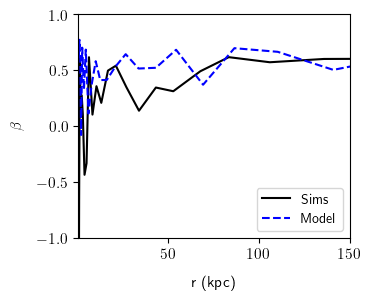

In [58]:
plt.figure(figsize=(3.5, 2.9))


plt.plot(pos_sims,beta_sims,label = 'Sims',c='black',linewidth=1.5)
plt.plot(pos_model,beta_model,'--',label='Model',c='blue',linewidth=1.5)
plt.xlabel('r (kpc)',fontsize=11)
plt.ylabel(r'$\beta$',fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlim((1,150))
plt.ylim((-1,1))
plt.legend(fontsize=10,loc = 'lower right')
plt.savefig('aniso_Au23_smooth_lowmet.pdf',format='pdf',bbox_inches='tight')

### Stellar halo comparison plots

#### Number density stellar halo

In [59]:
plt.rc('font', family='serif')

In [13]:
# Best fit galaxy model
df_best = agama.DistributionFunction(type ='DoublePowerLaw',
                                     norm=1,
                                slopeIn=slopein_best,
                                slopeOut = slopeout_best,
                                J0=J0_best,
                                coefJrIn = hr_best,
                                coefJzIn=hz_best,
                                coefJrOut=gr_best,
                                coefJzOut=gz_best,
                                rotFrac = rotFrac_best,
                                Jcutoff=12000.) 


gm = agama.GalaxyModel(pot_best,df_best)
print(df_best.totalMass())
print(J0_best)
print(slopeout_best)

1.3957089439701404
2818.614944655038
3.229563223202331


### Stellar halo density

RuntimeError: Error in sample(): Keyboard interrupt

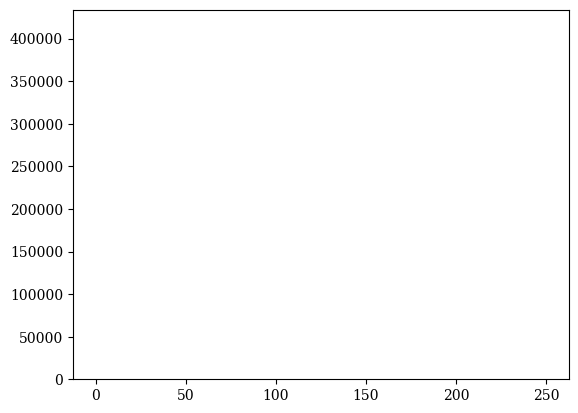

In [15]:
# Nr density for Auriga (using binning)
data_acc_Au = np.column_stack((xAu,yAu,zAu))
ndens_acc_Au,posAu_acc = bm.ndensity(data_acc_Au,30)

# Nr density for best-fit model (using binning)
data_best_sample,_ = gm.sample(len(xAu))
ndens_best,pos_best = bm.ndensity(np.column_stack((data_best_sample[:,0],data_best_sample[:,1],data_best_sample[:,2])),30)


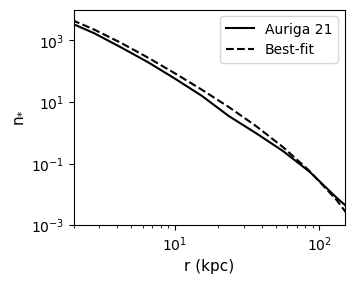

In [17]:
plt.rcParams["figure.figsize"] = [3.5,2.8]

plt.plot(posAu_acc,ndens_acc_Au,label='Auriga 21',c='black')
plt.plot(pos_best,ndens_best,'--',label='Best-fit',c='black')
plt.xlabel('r (kpc)',fontsize=11)
plt.ylabel(r'$\mathrm{n}_{*}$',fontsize=11)
# plt.xticks(fontsize=11)
# plt.yticks(fontsize=11)
plt.xlim((2.,150))
plt.ylim((10**(-3),10**(4)))
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.savefig('ndens_shalo_Au21.pdf',format='pdf',bbox_inches='tight')

In [18]:
np.savetxt('r_shalo_Au21.txt',posAu_acc)
np.savetxt('dens_shalo_Au21.txt',ndens_acc_Au)
np.savetxt('r_shalo_Au21_best.txt',pos_best)
np.savetxt('dens_shalo_Au21_best.txt',ndens_best)

### Stellar halo dlnrho/dlnr

In [29]:
r = np.logspace(np.log10(1.),np.log10(130),20)
r = np.linspace(1.,150,120)
r_grid = np.column_stack((r,r*0.,r*0.))

dens_shalo_Au = []
for i in range(len(r)):
    dens_ = ut.mean_density(pot_accAu, r[i])
    dens_shalo_Au.append(dens_)


# Auriga
ln_dens_Au = np.log(dens_shalo_Au)
ln_r_Au    = np.log(r)
dlnrho_dlnrAu = np.diff(ln_dens_Au)/np.diff(ln_r_Au)



KeyboardInterrupt: 

In [19]:
rmom = np.linspace(1.,150,30)
rmom_grid = np.column_stack((rmom,rmom*0,rmom*0.))
dens_shalo_best = gm.moments(rmom_grid,dens=True,vel=False,vel2=False)

# Best-fit
ln_dens_best = np.log(dens_shalo_best)
ln_r_best    = np.log(rmom)
dlnrho_dlnr_best = np.diff(ln_dens_best)/np.diff(ln_r_best)

ValueError: x and y must have same first dimension, but have shapes (119,) and (69,)

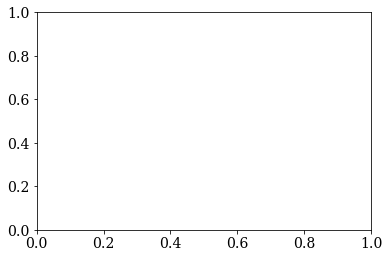

In [30]:
plt.plot(r[0:(len(r)-1)],dlnrho_dlnrAu,c='black',label='True')
plt.plot(rmom[0:(len(rmom)-1)],dlnrho_dlnr_best,'--',c='black',label='Best-fit')
plt.xscale('log')
plt.ylabel(r'$\mathrm{\frac{dln\rho}{dlnr}}$',fontsize=17)
plt.xlabel('r (kpc)',fontsize=14)
plt.savefig('dlnrho_dlnr_shalobest.pdf',format='pdf',bbox_inches='tight')

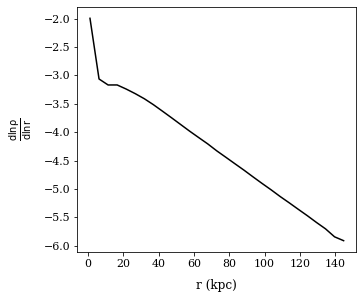

In [21]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(5,4.5)


ax.plot(rmom[0:(len(rmom)-1)],dlnrho_dlnr_best,c='black',label='Best-fit')
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlabel('r (kpc)',fontsize=12)
ax.set_ylabel(r'$\mathrm{\frac{dln\rho}{dlnr}}$',fontsize=14)

plt.savefig('dlnrho_dlnr_shalobest.pdf',format='pdf',bbox_inches='tight')

In [91]:
## Density contour plots of stellar halo (form best-fit)
n = 20
R = np.linspace(0.0001,150/np.sqrt(2),n)
z = np.linspace(0.0001,150/np.sqrt(2),n)


dens2d = np.zeros((len(R),len(z)))


for i in range(len(R)):
    for j in range(len(z)):
        dens2d[i,j] = gm.moments(np.array([R[i],0,z[j]]),dens=True,vel=False,vel2=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


LinAlgError: Singular matrix

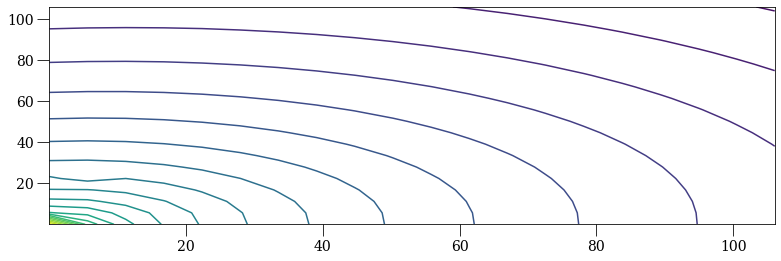

In [93]:
Rgrid, zgrid = np.meshgrid(R,z)

from scipy import signal as scisig
import Payel_UsefulMethods as fit_ellipse



fig00    = plt.figure(figsize=(13,4))
ctr      = plt.contour(R,z,np.transpose(np.log10(dens2d)),20)
#ctr      = plt.contourf(R,z,np.transpose(np.log10(dens2d)),10) # Paula: changed contour to contourf -> more points defining the ellipses?

nq       = len(ctr.allsegs)
qdens    = np.zeros(nq)
ellrdens = np.zeros(nq)
elldens  = np.zeros(nq)
for i in range(nq):
    if (i>0) & (i<nq-1):
        print(i)
        v           = ctr.allsegs[i][0]
        ellR        = np.concatenate((v[:,0],-v[:,0],v[:,0],-v[:,0]))
        ellz        = np.concatenate((v[:,1],v[:,1],-v[:,1],-v[:,1]))
        
        elips       = fit_ellipse.fitEllipse(ellR,ellz)
        center      = fit_ellipse.ellipse_center(elips)
        phi         = fit_ellipse.ellipse_angle_of_rotation(elips)
        axes        = fit_ellipse.ellipse_axis_length(elips)
        a, b        = axes
        #print('*****')
        #print([a,b])
        qdens[i]    = b/a
        #print(qdens[i])
        #print(i)
        #print('*********')
        ellrdens[i] = a
        elldens[i]  = ctr.levels[i]

In [75]:
# Flattening
from scipy.interpolate import interp1d

notnan   = ~np.isnan(ellrdens)
ellrdens = ellrdens[notnan]
elldens  = elldens[notnan]
qdens    = qdens[notnan]


#plt.plot(np.log10(ellrdens[0:30]),np.log10(elldens[0:30]))
#plt.plot(ellrdens[1:nq-1],qdens[1:nq-1],c='black')
#plt.plot(ellrdens,qdens)
f2 = interp1d(ellrdens[1:nq-1], qdens[1:nq-1], kind='linear')
r_new = np.linspace(5,100,20)


ValueError: A value (5.0) in x_new is above the interpolation range's maximum value (3.283025865018218).

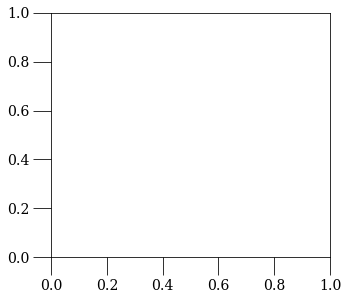

In [77]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(5,4.5)
ax.plot(r_new,f2(r_new),c='black')
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.set_xlabel('a (kpc)',fontsize=12)
ax.set_ylabel('q',fontsize=12)

#plt.savefig('q_vs_r.pdf',format='pdf',bbox_inches='tight')

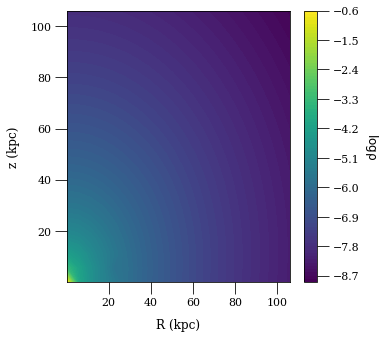

In [92]:
# Plot contour-plot (best-fit)
plt.rc('font', family='serif')


fig,ax=plt.subplots(1,1)
fig.set_size_inches(5,5)


#cf = ax.contourf(R, z,np.transpose(np.log10(dens2d)),levels = 100,cmap="viridis") # filled contours
#cs = ax.contour(R, z, np.transpose(np.log10(dens2d)),levels = 7, colors = 'grey') # lines
cf = ax.contourf(R, z,np.log10(dens2d),levels = 100,cmap="viridis") # filled contours
ax.set_xlabel('R (kpc)',fontsize=12)
ax.set_ylabel('z (kpc)',fontsize=12)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
cbar = fig.colorbar(cf) # Add a colorbar to a plot
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel(r'$\mathrm{log\rho}$',rotation=270,fontsize=12)
cbar.ax.tick_params(labelsize=11)
plt.savefig('dens_contour_bestfit_shalo_Au21.pdf',format='pdf',bbox_inches='tight')

In [16]:
# Best-fit model

dat_,_=gm.sample(30000)
x = dat_[:,0]
y = dat_[:,1]
z = dat_[:,2]
vx = dat_[:,3]
vy = dat_[:,4]
vz = dat_[:,5]
R = np.sqrt(x**2.+y**2.)

dct = {'R':R, 'z':z}
dframe = pd.DataFrame(dct)

# Auriga
RAu = np.sqrt(xAu**2.+yAu**2.)
dframeAu = pd.DataFrame({'R':RAu,'z':zAu})

In [21]:
v = np.sqrt(vx**2.+vy**2.+vz**2.)
r = np.sqrt(R**2.+z**2.)

vAu = np.sqrt(vxAu**2.+vyAu**2.+vzAu**2.)
rAu = np.sqrt(xAu**2.+yAu**2.+zAu**2.)

<AxesSubplot:ylabel='Density'>

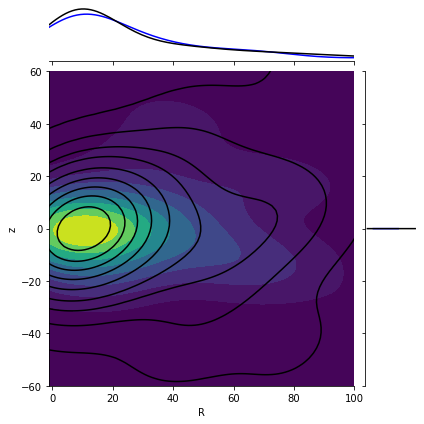

In [181]:
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#plt.rcParams['figure.figsize'] = (10, 10)

g = sns.JointGrid(x="R", y="z", data=dframe,xlim=[-1,100], ylim=[-60,60])
#g = sns.jointplot(data=dframe, x="R", y="z",kind='kde')
sns.kdeplot(R,z,shade=True,cmap='viridis',shade_lowest=True,ax=g.ax_joint)
sns.kdeplot(RAu,zAu,color='black',ax=g.ax_joint )
sns.distplot(R, kde=True, hist=False, color="blue", ax=g.ax_marg_x)
sns.distplot(z, kde=True, hist=False, color="blue", ax=g.ax_marg_y)
sns.distplot(RAu, kde=True, hist=False, color="black", ax=g.ax_marg_x)
sns.distplot(zAu, kde=True, hist=False, color="black", ax=g.ax_marg_y)




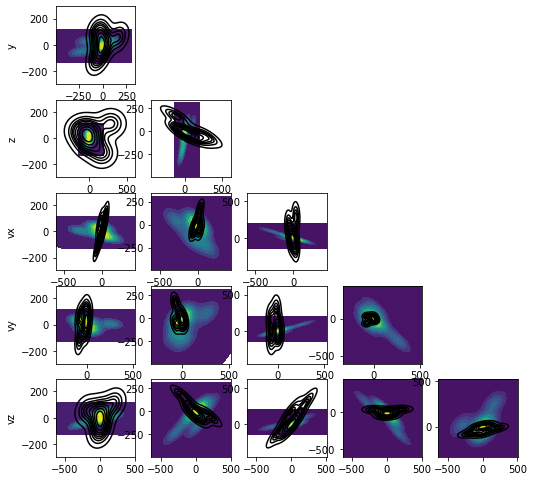

In [240]:

fig = plt.figure()

data = np.array([1,2,3])
plotz = len(data)
xlabel = np.array(['x','y','z','vx','vy'])
ylabel = np.array(['y','z','vx','vy','vz'])

datax = np.column_stack((x,y,z,vx,vy,vz))
dataxAu = np.column_stack((xAu,yAu,zAu,vxAu,vyAu,vzAu))
datay = np.column_stack((y,z,vx,vy,vz))
datayAu = np.column_stack((yAu,zAu,vxAu,vyAu,vzAu))



for i in range(6):
    for j in range(7):
        if(i>j) :
            #print(j,i)                
            ax = plt.subplot2grid((6, 6), (i-1,j))
            #ax.xaxis.set_ticklabels()
            #ax.yaxis.set_ticklabels()
            #plt.scatter(data,data) # might be nice with shared axis limits
            sns.kdeplot(datax[i,:],datax[j,:],shade=True,cmap='viridis',shade_lowest=True)
            sns.kdeplot(dataxAu[i,:],dataxAu[j,:],color='black')
            if (j==0):
                ax.set_ylabel(ylabel[i-1])
            if (i==4):
                ax.set_xlabel(xlabel[j])
            #ax.legend(str(i)+','+str(j))

            
plt.savefig('test.pdf', format='pdf')

In [221]:
ax_list

[<AxesSubplot:ylabel='y'>,
 <AxesSubplot:ylabel='z'>,
 <AxesSubplot:>,
 <AxesSubplot:ylabel='vx'>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:xlabel='x', ylabel='vy'>,
 <AxesSubplot:xlabel='y'>,
 <AxesSubplot:xlabel='z'>,
 <AxesSubplot:xlabel='vx'>,
 <AxesSubplot:ylabel='vz'>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>]

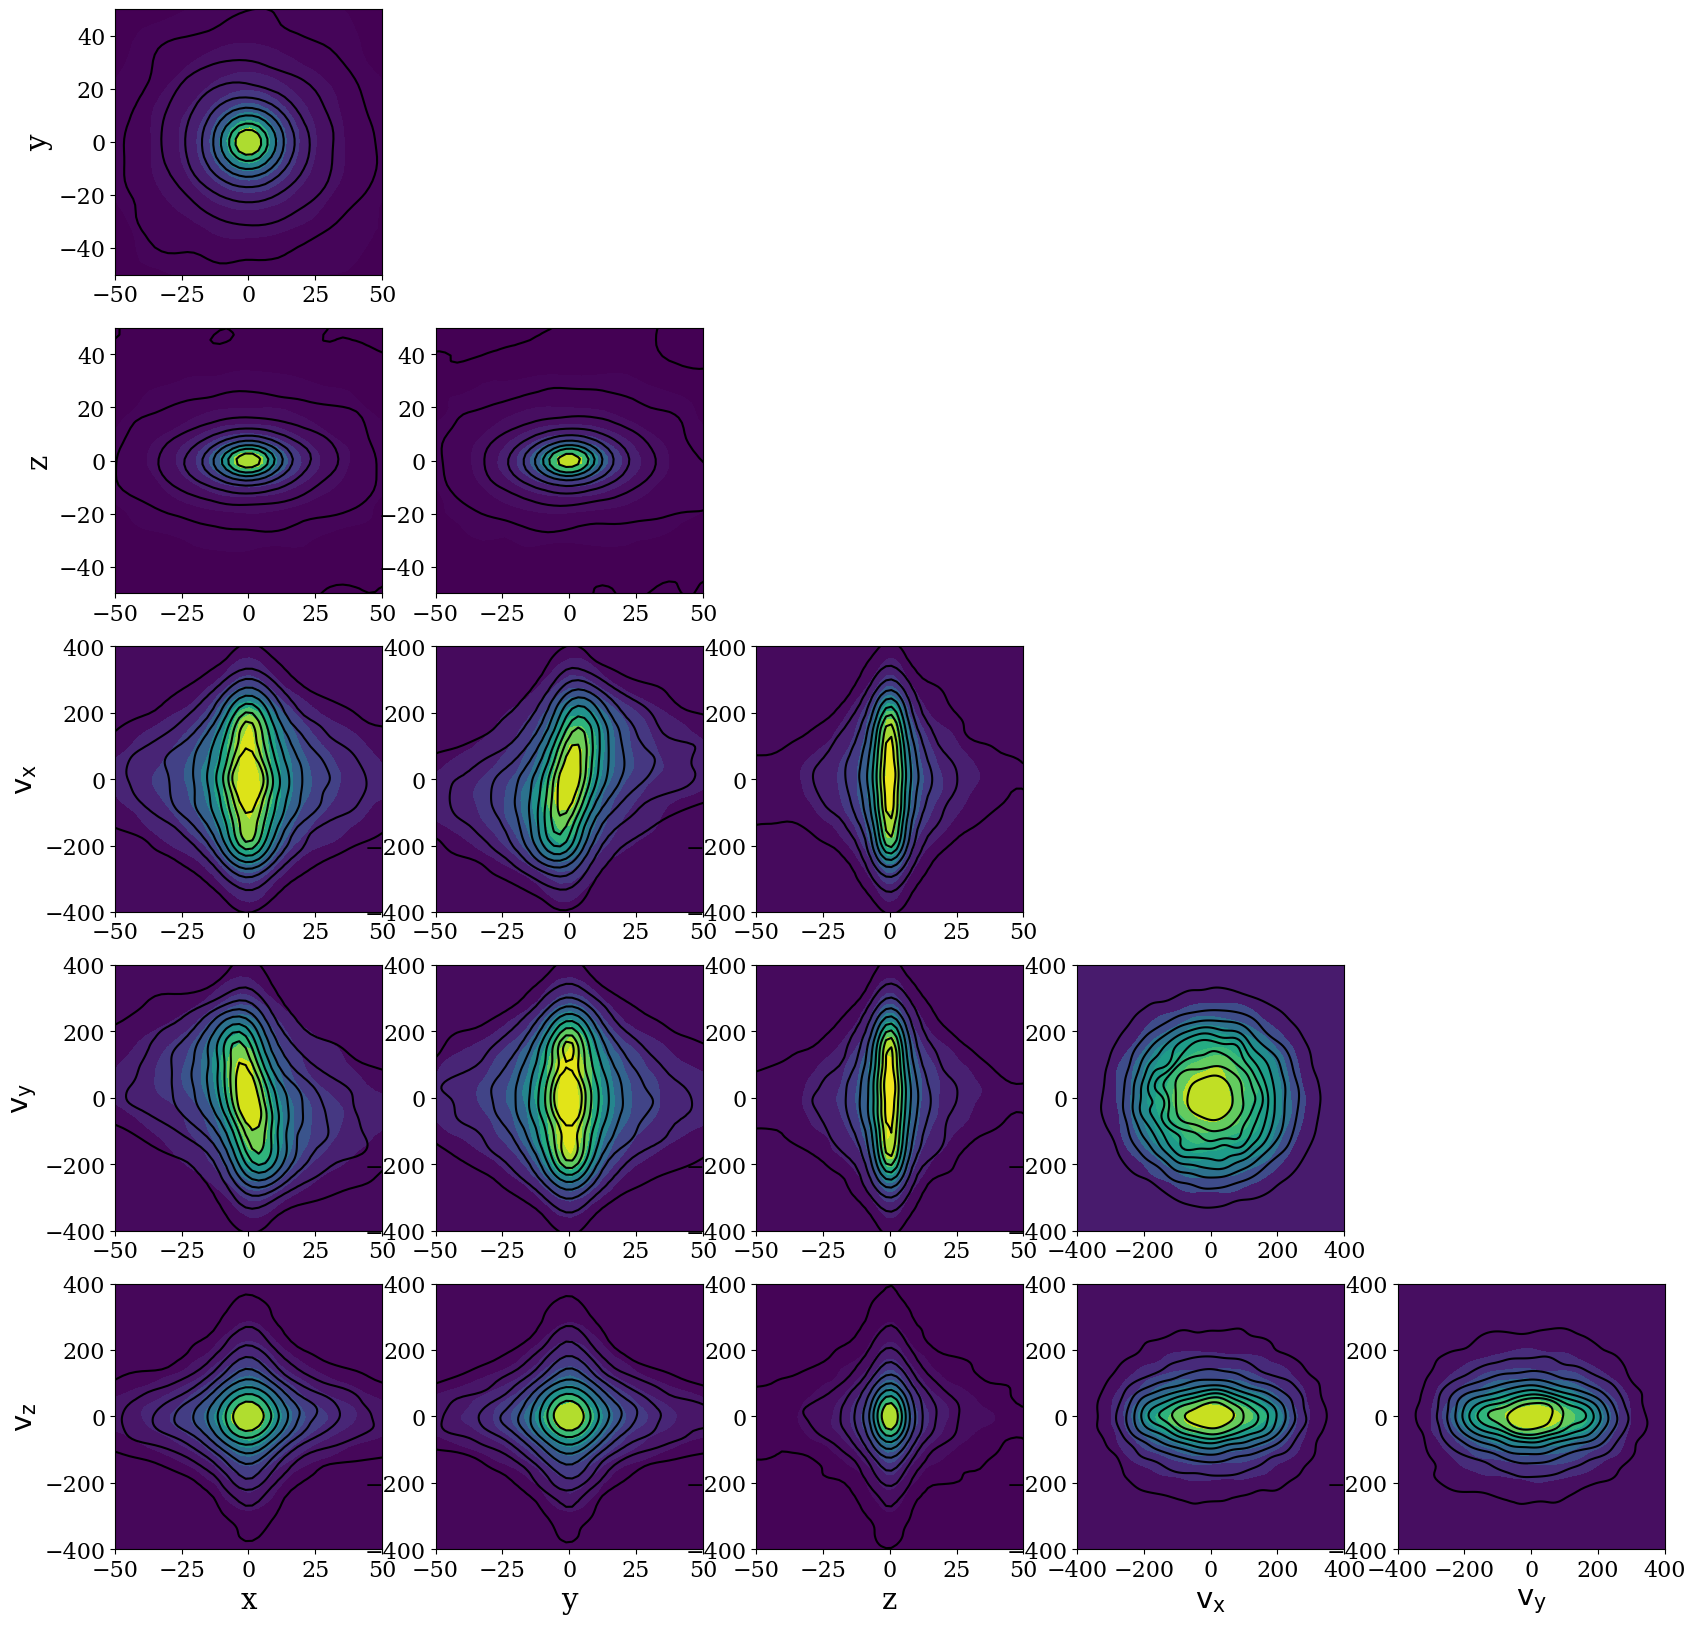

In [18]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#define figure
fig = plt.figure()
fig.set_size_inches(20, 20)
#add subplots



#row 1
ax11 = fig.add_subplot(5,5,1)
sns.kdeplot(x,y,shade=True,cmap='viridis',shade_lowest=True,ax=ax11)
sns.kdeplot(xAu,yAu,color='black',ax=ax11)
ax11.set_xlim((-50,50))
ax11.set_ylim((-50,50))
ax11.set_ylabel('y',fontsize=21)
ax11.tick_params(axis='both', which='major', labelsize=16)
ax11.tick_params(axis='both', which='minor', labelsize=16)

#row2
ax21 = fig.add_subplot(5,5,6)
sns.kdeplot(x,z,shade=True,cmap='viridis',shade_lowest=True,ax=ax21)
sns.kdeplot(xAu,zAu,color='black',ax=ax21)
ax21.set_xlim((-50,50))
ax21.set_ylim((-50,50))
ax21.set_ylabel('z',fontsize=21)
ax21.tick_params(axis='both', which='major', labelsize=16)
ax21.tick_params(axis='both', which='minor', labelsize=16)


ax22 = fig.add_subplot(5,5,7)
sns.kdeplot(y,z,shade=True,cmap='viridis',shade_lowest=True,ax=ax22)
sns.kdeplot(yAu,zAu,color='black',ax=ax22)
ax22.set_xlim((-50,50))
ax22.set_ylim((-50,50))
ax22.tick_params(axis='both', which='major', labelsize=16)
ax22.tick_params(axis='both', which='minor', labelsize=16)
#ax22.set_ylabel('z')



#row3
ax31 = fig.add_subplot(5,5,11)
sns.kdeplot(x,vx,shade=True,cmap='viridis',shade_lowest=True,ax=ax31)
sns.kdeplot(xAu,vxAu,color='black',ax=ax31)
ax31.set_xlim((-50,50))
ax31.set_ylim((-400,400))
ax31.set_ylabel(r'$\mathrm{v_{x}}}$',fontsize=21)
ax31.tick_params(axis='both', which='major', labelsize=16)
ax31.tick_params(axis='both', which='minor', labelsize=16)


ax32 = fig.add_subplot(5,5,12)
sns.kdeplot(y,vx,shade=True,cmap='viridis',shade_lowest=True,ax=ax32)
sns.kdeplot(yAu,vxAu,color='black',ax=ax32)
ax32.set_xlim((-50,50))
ax32.set_ylim((-400,400))
ax32.tick_params(axis='both', which='major', labelsize=16)
ax32.tick_params(axis='both', which='minor', labelsize=16)
#ax32.set_ylabel('vx')

ax33 = fig.add_subplot(5,5,13)
sns.kdeplot(z,vx,shade=True,cmap='viridis',shade_lowest=True,ax=ax33)
sns.kdeplot(zAu,vxAu,color='black',ax=ax33)
ax33.set_xlim((-50,50))
ax33.set_ylim((-400,400))
ax33.tick_params(axis='both', which='major', labelsize=16)
ax33.tick_params(axis='both', which='minor', labelsize=16)
#ax32.set_ylabel('vx')


#row4
ax41 = fig.add_subplot(5,5,16)
sns.kdeplot(x,vy,shade=True,cmap='viridis',shade_lowest=True,ax=ax41)
sns.kdeplot(xAu,vyAu,color='black',ax=ax41)
ax41.set_xlim((-50,50))
ax41.set_ylim((-400,400))
ax41.set_ylabel(r'$\mathrm{v_{y}}$',fontsize=21)
ax41.tick_params(axis='both', which='major', labelsize=16)
ax41.tick_params(axis='both', which='minor', labelsize=16)

ax42 = fig.add_subplot(5,5,17)
sns.kdeplot(y,vy,shade=True,cmap='viridis',shade_lowest=True,ax=ax42)
sns.kdeplot(yAu,vyAu,color='black',ax=ax42)
ax42.set_xlim((-50,50))
ax42.set_ylim((-400,400))
ax42.tick_params(axis='both', which='major', labelsize=16)
ax42.tick_params(axis='both', which='minor', labelsize=16)
#ax42.set_ylabel('vy')


ax43 = fig.add_subplot(5,5,18)
sns.kdeplot(z,vy,shade=True,cmap='viridis',shade_lowest=True,ax=ax43)
sns.kdeplot(zAu,vyAu,color='black',ax=ax43)
ax43.set_xlim((-50,50))
ax43.set_ylim((-400,400))
ax43.tick_params(axis='both', which='major', labelsize=16)
ax43.tick_params(axis='both', which='minor', labelsize=16)
#ax43.set_ylabel('vy')

ax44 = fig.add_subplot(5,5,19)
sns.kdeplot(vx,vy,shade=True,cmap='viridis',shade_lowest=True,ax=ax44)
sns.kdeplot(vxAu,vyAu,color='black',ax=ax44)
ax44.set_xlim((-400,400))
ax44.set_ylim((-400,400))
ax44.tick_params(axis='both', which='major', labelsize=16)
ax44.tick_params(axis='both', which='minor', labelsize=16)
#ax44.set_ylabel('vy')



#row5
ax51 = fig.add_subplot(5,5,21)
sns.kdeplot(x,vz,shade=True,cmap='viridis',shade_lowest=True,ax=ax51)
sns.kdeplot(xAu,vzAu,color='black',ax=ax51)
ax51.set_xlim((-50,50))
ax51.set_ylim((-400,400))
ax51.set_ylabel(r'$\mathrm{v_{z}}$',fontsize=21)
ax51.set_xlabel('x',fontsize=21)
ax51.tick_params(axis='both', which='major', labelsize=16)
ax51.tick_params(axis='both', which='minor', labelsize=16)

ax52 = fig.add_subplot(5,5,22)
sns.kdeplot(y,vz,shade=True,cmap='viridis',shade_lowest=True,ax=ax52)
sns.kdeplot(yAu,vzAu,color='black',ax=ax52)
ax52.set_xlim((-50,50))
ax52.set_ylim((-400,400))
ax52.set_xlabel('y',fontsize=21)
ax52.tick_params(axis='both', which='major', labelsize=16)
ax52.tick_params(axis='both', which='minor', labelsize=16)


ax53 = fig.add_subplot(5,5,23)
sns.kdeplot(z,vz,shade=True,cmap='viridis',shade_lowest=True,ax=ax53)
sns.kdeplot(zAu,vzAu,color='black',ax=ax53)
ax53.set_xlim((-50,50))
ax53.set_ylim((-400,400))
ax53.set_xlabel('z',fontsize=21)
ax53.tick_params(axis='both', which='major', labelsize=16)
ax53.tick_params(axis='both', which='minor', labelsize=16)



ax54 = fig.add_subplot(5,5,24)
sns.kdeplot(vx,vz,shade=True,cmap='viridis',shade_lowest=True,ax=ax54)
sns.kdeplot(vxAu,vzAu,color='black',ax=ax54)
ax54.set_xlim((-400,400))
ax54.set_ylim((-400,400))
ax54.set_xlabel(r'$\mathrm{v_{x}}$',fontsize=21)
ax54.tick_params(axis='both', which='major', labelsize=16)
ax54.tick_params(axis='both', which='minor', labelsize=16)


ax55 = fig.add_subplot(5,5,25)
sns.kdeplot(vy,vz,shade=True,cmap='viridis',shade_lowest=True,ax=ax55)
sns.kdeplot(vyAu,vzAu,color='black',ax=ax55)
ax55.set_xlim((-400,400))
ax55.set_ylim((-400,400))
ax55.set_xlabel(r'$\mathrm{v_{y}}$',fontsize=21)
ax55.tick_params(axis='both', which='major', labelsize=16)
ax55.tick_params(axis='both', which='minor', labelsize=16)



fig.savefig('stellar_halo_phase_space_fit_Au24_rev.pdf', format='pdf',bbox_inches='tight')


### Velocities

In [12]:
data_best_sample,_ = gm.sample(len(x_acc))


In [13]:
data_acc_Au = np.column_stack((x_acc,y_acc,z_acc,vx_acc,vy_acc,vz_acc))
data_acc_Au_spherical = ct.CartesianToSpherical(data_acc_Au)
r_Au = data_acc_Au_spherical[:,0]
vphi_Au = data_acc_Au_spherical[:,5]

In [20]:
### Vel dispersion stellar halo

# Nr density for Auriga (using binning)
data_acc_Au = np.column_stack((xAu,yAu,zAu,vxAu,vyAu,vzAu))
#df_meanv_Au = bm.calc_mean_v(data_acc_Au,30)
df_meanv_Au = calc_mean_v(data_acc_Au,100)
pos_Au  = df_meanv_Au['pos']
vr_mean_Au = df_meanv_Au['mean_vr']
vtheta_mean_Au = df_meanv_Au['mean_vtheta']
vphi_mean_Au = df_meanv_Au['mean_vphi']


# # Nr density for best-fit model (using binning)
# #df_meanv_best = bm.calc_mean_v(data_best_sample,100)
# df_meanv_best = calc_mean_v(data_best_sample,100)
# pos_best = df_meanv_best['pos']
# vr_mean_best = df_meanv_best['mean_vr']
# vtheta_mean_best = df_meanv_best['mean_vtheta']
# vphi_mean_best = df_meanv_best['mean_vphi']

In [14]:
# Mean vphi with new binning methods
#rbins = np.logspace(np.log10(0.00001), np.log10(150), 30)
rbins = np.linspace(0.000001,150,70)
pos_Au_vphi, vphi_mean = bm2.average_vphi_binning(vphi_Au,r_Au,rbins)

In [15]:
rgrid = np.column_stack((rbins,rbins*0,rbins*0))
v = gm.moments(rgrid,dens=False, vel=True,vel2=False)

In [16]:
print(v[:,1])
vphi_agama = v[:,1]
v_ = vphi_agama[:-1]

[  -0.14395815 -107.11283204 -109.13348799 -108.96447401 -107.50395513
 -105.12142464 -102.10839925  -98.80494104  -95.59325279  -92.6729269
  -90.06440741  -87.70439427  -85.53005317  -83.40813368  -81.41928569
  -79.3880773   -77.38590167  -75.41972951  -73.44659412  -71.49959958
  -69.57545176  -67.64159609  -65.75517186  -63.91453046  -62.07939343
  -60.29709743  -58.55587367  -56.88421702  -55.21891462  -53.62851074
  -52.07422084  -50.56419072  -49.11692475  -47.70276859  -46.33688508
  -45.01269863  -43.71750249  -42.45706235  -41.23888511  -40.03840563
  -38.88016058  -37.74971959  -36.67183393  -35.64307904  -34.64211122
  -33.68380639  -32.7695466   -31.87836334  -31.03280412  -30.20884429
  -29.41693592  -28.65277709  -27.91175225  -27.20760683  -26.51763094
  -25.86734571  -25.23485592  -24.61045911  -24.03703519  -23.4572573
  -22.91725947  -22.38387472  -21.88093325  -21.38798512  -20.90243336
  -20.42000508  -19.99036075  -19.5573006   -19.13732539  -18.73553132]


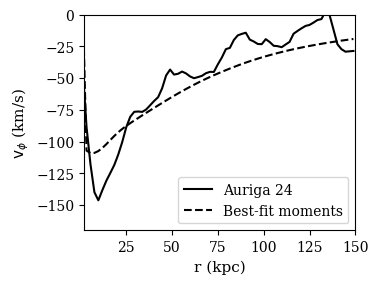

In [17]:
plt.rcParams["figure.figsize"] = [3.5,2.8]


plt.plot(pos_Au_vphi,vphi_mean,c='black',label='Auriga 24',linewidth=1.5)
#plt.plot(pos_best,vphi_mean_best, label='Best-fit')
plt.plot(pos_Au_vphi,v_,'--',c='black',label='Best-fit moments',linewidth=1.5)
#plt.plot(pos_best,vphi_mean_best,'--',c='black',label='Best-fit',linewidth=1.5)
plt.xlabel('r (kpc)',fontsize=11)
plt.ylabel(r'$\mathrm{v}_{\phi}$ (km/s)',fontsize=11)
plt.xlim((2,150))
plt.ylim(-170,0)
plt.legend(loc='lower right')

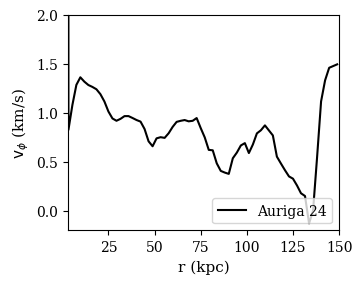

In [22]:
plt.plot(pos_Au_vphi,vphi_mean/v_,c='black',label='Auriga 24',linewidth=1.5)
#plt.plot(pos_best,vphi_mean_best, label='Best-fit')
#plt.plot(pos_Au_vphi,v_,'--',c='black',label='Best-fit moments',linewidth=1.5)
#plt.plot(pos_best,vphi_mean_best,'--',c='black',label='Best-fit',linewidth=1.5)
plt.xlabel('r (kpc)',fontsize=11)
plt.ylabel(r'$\mathrm{v}_{\phi}$ (km/s)',fontsize=11)
plt.xlim((3,150))
plt.ylim(-0.2,2)
plt.legend(loc='lower right')

In [24]:
np.savetxt('pos_best_Au23_vphi_r2.txt',pos_Au_vphi)
np.savetxt('vphi_mean_best_Au23_r2.txt',v_)
np.savetxt('pos_Au23_vphi_r2.txt',pos_Au_vphi)
np.savetxt('vphi_mean_Au23_r2.txt',vphi_mean)

In [23]:
r = np.linspace(0.1,150,20)
rgrid = np.column_stack((r,r*0,r*0))
v = gm.moments(rgrid,dens=False, vel=True,vel2=False)

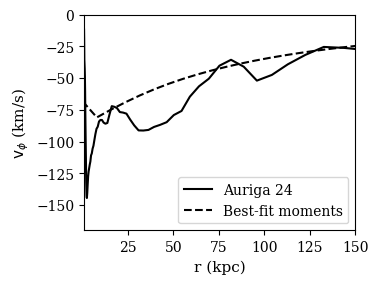

In [27]:
plt.rcParams["figure.figsize"] = [3.5,2.8]


plt.plot(pos_Au,vphi_mean_Au,c='black',label='Auriga 24',linewidth=1.5)
#plt.plot(pos_best,vphi_mean_best, label='Best-fit')
plt.plot(r,v[:,1],'--',c='black',label='Best-fit moments',linewidth=1.5)
#plt.plot(pos_best,vphi_mean_best,'--',c='black',label='Best-fit',linewidth=1.5)
plt.xlabel('r (kpc)',fontsize=11)
plt.ylabel(r'$\mathrm{v}_{\phi}$ (km/s)',fontsize=11)
plt.xlim((1,150))
plt.ylim(-170,0)
plt.legend(loc='lower right')

#plt.savefig('vphi_mean_shalo_Auriga.pdf',format='pdf',bbox_inches='tight')

In [25]:
np.savetxt('pos_best_Au21.txt',pos_best)
np.savetxt('vphi_mean_best_Au21.txt',vphi_mean_best)
np.savetxt('pos_Au21.txt',pos_Au)
np.savetxt('vphi_mean_Au21.txt',vphi_mean_Au)

In [28]:
data_best_sample,_ = gm.sample(2773553)
data_acc_Au = np.column_stack((xAu,yAu,zAu,vxAu,vyAu,vzAu))

In [29]:
# Calculate dispersions
df_disp_best = bm.calc_disp_beta(data_best_sample,30)
disp_vr_best = df_disp_best['disp_vr']
disp_vtheta_best = df_disp_best['disp_vtheta']
disp_vphi_best = df_disp_best['disp_vphi']
pos_best = df_disp_best['pos']
beta_best = df_disp_best['beta']


df_disp_Au = bm.calc_disp_beta(data_acc_Au,30)
disp_vr_Au = df_disp_Au['disp_vr']
disp_vtheta_Au = df_disp_Au['disp_vtheta']
disp_vphi_Au = df_disp_Au['disp_vphi']
pos_Au = df_disp_Au['pos']
beta_Au = df_disp_Au['beta']


In [94]:
r = np.linspace(0.1,150,20)
rgrid = np.column_stack((r,r*0,r*0))
vel2 = gm.moments(rgrid,dens=False,vel=False,vel2=True)

In [96]:
sigma_vr_best = np.sqrt(vel2[:,0])
sigma_vtheta_best = np.sqrt(vel2[:,1])
sigma_vphi_best = np.sqrt(vel2[:,2])

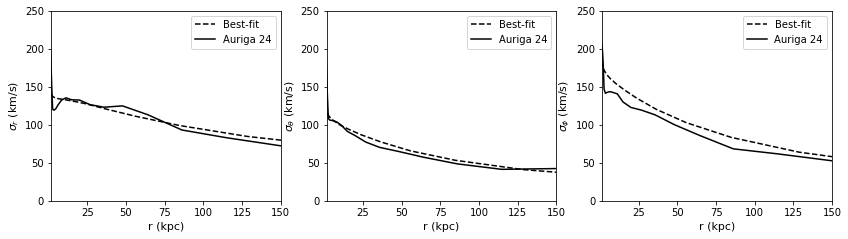

In [100]:
fig, (ax1, ax2, ax3)= plt.subplots(1, 3)
fig.set_size_inches(14,3.5)


ax1.plot(pos_best, disp_vr_best,'--',c='black',label='Best-fit',linewidth = 1.5)
#ax1.plot(r, sigma_vr_best,'--',c='red',label='Best-fit')
ax1.plot(pos_Au, disp_vr_Au,c='black',label='Auriga 24',linewidth = 1.5)
ax1.set_xlabel('r (kpc)',fontsize=11)
ax1.set_ylabel(r'$\sigma_{r}$ (km/s)',fontsize=11)
ax1.set_xlim((1.5,150))
ax1.set_ylim((0,250))
ax1.legend()

ax2.plot(pos_best, disp_vtheta_best,'--',c='black',label='Best-fit',linewidth = 1.5)
ax2.plot(pos_Au, disp_vtheta_Au,c='black',label='Auriga 24',linewidth = 1.5)
ax2.set_xlabel('r (kpc)',fontsize=11)
ax2.set_ylabel(r'$\sigma_{\theta}$ (km/s)',fontsize=11)
ax2.set_xlim((1.5,150))
ax2.set_ylim((0,250))
ax2.legend()

ax3.plot(pos_best, disp_vphi_best,'--',c='black',label='Best-fit',linewidth = 1.5)
#ax3.plot(r, sigma_vphi_best,'--',c='red',label='Best-fit')
ax3.plot(pos_Au, disp_vphi_Au,c='black',label='Auriga 24',linewidth = 1.5)
ax3.set_xlabel('r (kpc)',fontsize=11)
ax3.set_ylabel(r'$\sigma_{\phi}$ (km/s)',fontsize=11)
ax3.set_xlim((1.5,150))
ax3.set_ylim((0,250))
ax3.legend()

plt.savefig('vel_disp_shalo_Auriga.pdf',format='pdf',bbox_inches='tight')

In [14]:
# Reviewer 2 plots
# Best fit galaxy model
df_best = agama.DistributionFunction(type ='DoublePowerLaw',
                                     norm=1,
                                slopeIn=slopein_best,
                                slopeOut = slopeout_best,
                                J0=J0_best,
                                coefJrIn = hr_best,
                                coefJzIn=hz_best,
                                coefJrOut=gr_best,
                                coefJzOut=gz_best,
                                rotFrac = rotFrac_best,
                                Jcutoff=12000.) 


gm = agama.GalaxyModel(pot_best,df_best)

#rbins = np.linspace(0.001,200,30)
data_best_sample,_ = gm.sample(len(x_acc))
data_acc_Au = np.column_stack((x_acc,y_acc,z_acc,vx_acc,vy_acc,vz_acc))



In [15]:
rbins = np.logspace(np.log10(1.),np.log10(200),30)
#rbins = np.linspace(1,200,40)

pos_best,sig_vr_best,sig_vt_best,sig_vp_best = bm2.vel_dispersion_spherical_binning(data_best_sample,
                                                                                    rbins)

pos_best_Au,sig_vr_Au,sig_vt_Au,sig_vp_Au = bm2.vel_dispersion_spherical_binning(data_acc_Au,
                                                                                    rbins)

sig_vr_best = np.array(sig_vr_best)
sig_vt_best = np.array(sig_vt_best)
sig_vp_best = np.array(sig_vp_best)
sig_vr_Au = np.array(sig_vr_Au)
sig_vt_Au = np.array(sig_vt_Au)
sig_vp_Au = np.array(sig_vp_Au)

beta_best = 1-0.5*((sig_vt_best**2.+sig_vp_best**2)/(sig_vr_best**2))
beta_Au = 1-0.5*((sig_vt_Au**2.+sig_vp_Au**2)/(sig_vr_Au**2))

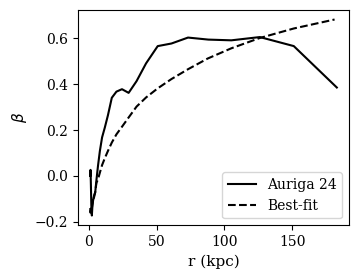

In [16]:
plt.rcParams["figure.figsize"] = [3.5,2.8]


plt.plot(pos_best_Au,beta_Au,c='black',label='Auriga 24',linewidth=1.5)
#plt.plot(pos_best,vphi_mean_best, label='Best-fit')
plt.plot(pos_best,beta_best,'--',c='black',label='Best-fit',linewidth=1.5)
#plt.plot(pos_best,vphi_mean_best,'--',c='black',label='Best-fit',linewidth=1.5)
plt.xlabel('r (kpc)',fontsize=11)
plt.ylabel(r'$\beta$',fontsize=11)
#plt.xlim((1,190))
#plt.ylim(-170,0)
plt.legend(loc='lower right')

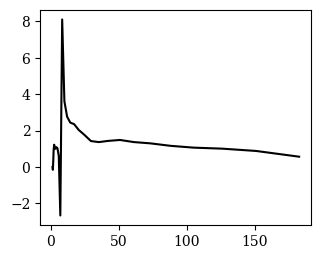

In [17]:
plt.plot(pos_best_Au,beta_Au/beta_best,c='black',label='Auriga 24',linewidth=1.5)


In [18]:
np.savetxt('pos_best_beta_Au24.txt',pos_best)
np.savetxt('pos_beta_Au24.txt',pos_best_Au)
np.savetxt('beta_best_Au24.txt',beta_best)
np.savetxt('beta_Au24.txt',beta_Au)